In [ ]:
print("Elcano World")

# 1. Business Understanding

# 2. Data Integration

## 2.1 Libraries Import

In [89]:
# Necessary installations

#!pip install seaborn
#!pip install matplotlib
#!pip install numpy
#!pip install pandas
#!pip install scikit-learn
#!pip install scipy


# Necessary imports

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

from functions import *

from scipy.stats import skew

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

# setting the style of seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

## 2.2 Data Load

In [53]:
# Importing the dataset
df = pd.read_csv('Case1_HotelCustomerSegmentation.csv', sep=';')
df.set_index('ID', inplace=True)

### 2.2.1 Metadata

ID: Customer ID

Nationality: Nationality of the customer in ISO 3166-1 (Alpha 3) format

Age: The age of the customer

DaysSinceCreation: Number of elapsed days since the customer was created

NameHash: Hash of the customer's name

DocIDHash: Hash of the customer’s personal document identification number (usually a passport or ID card)

AverageLeadTime: Average number of days before arrival date the customer makes bookings

LodgingRevenue: Total amount of lodging revenue paid by the customer so far

OtherRevenue: Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far

BookingsCanceled: Number of bookings the customer made but subsequently canceled

BookingsNoShowed: Number of bookings the customer made but subsequently made a "no-show"

BookingsCheckedin: Number of bookings the customer made, which actually ended up staying

PersonNights: Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in
each booking, multiplied by the number of Nights (Length-of-stay) of the booking

RoomNights: Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of
rooms of each booking by the the number of Nights (Length-of stay) of the booking

DistributionChannel: Distribution channel normally used by the customer to make bookings at the hotel

MarketSegment: Current market segment of the customer

SRHighFloor: Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes)

SRLowFloor: Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes)

SRAccessibleRoom: Indication if the customer usually asks for an accessible room (0: No, 1: Yes)

SRMediumFloor: Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes)

SRBathtub Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes)

SRShower: Indication if the customer usually asks for a room with a shower (0: No, 1: Yes)

SRCrib: Indication if the customer usually asks for a crib (0: No, 1: Yes)

SRKingSizeBed: Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes)

SRTwinBed Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes)

SRNearElevator: Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes)

SRAwayFromElevator: Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes)

SRNoAlcoholInMiniBar: Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes)

SRQuietRoom: Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes)

NOTE: All time-based columns (e.g., Age or DaysSinceCreation) were calculated at the dataset extraction date.

### 2.2.2 Data Overview

In [54]:
# Show all the columns when doing head()
pd.set_option('display.max_columns', None)
df.head()

Nationality   Age  DaysSinceCreation  \
ID                                        
1          PRT  52.0                440   
2          PRT   NaN               1385   
3          DEU  32.0               1385   
4          FRA  61.0               1385   
5          FRA  52.0               1385   

                                             NameHash  \
ID                                                      
1   0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...   
2   0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...   
3   0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
4   0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...   
5   0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   

                                            DocIDHash  AverageLeadTime  \
ID                                                                       
1   0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...               59   
2   0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               61   
3   0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...                0   
4   0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...               93   
5   0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...                0   

    LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                     
1            292.0          82.3                 1                 0   
2            280.0          53.0                 0                 0   
3              0.0           0.0                 0                 0   
4            240.0          60.0                 0                 0   
5              0.0           0.0                 0                 0   

    BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                        
1                   2              6           4              Corporate   
2                   1             10           5  Travel Agent/Operator   
3                   0              0           0  Travel Agent/Operator   
4                   1             10           5  Travel Agent/Operator   
5                   0              0           0  Travel Agent/Operator   

            MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
ID                                                                     
1               Corporate            0           0                 0   
2   Travel Agent/Operator            0           0                 0   
3   Travel Agent/Operator            0           0                 0   
4   Travel Agent/Operator            0           0                 0   
5   Travel Agent/Operator            0           0                 0   

    SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
ID                                                                         
1               0          0         0       0              0          0   
2               0          0         0       0              0          0   
3               0          0         0       0              0          0   
4               0          0         0       0              0          0   
5               0          0         0       0              0          0   

    SRNearElevator  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                                         
1                0                   0                     0            0  
2                0                   0                     0            0  
3                0                   0                     0            0  
4                0                   0                     0            0  
5                0                   0                     0            0

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

### 2.2.3 Filtering out unnecessary columns

In [56]:
# Dropping unnecessary columns
df.drop(['NameHash', 'DocIDHash'], axis=1, inplace=True)

### 2.2.4. Data Types

In [57]:
pd.DataFrame(df.dtypes.rename('Datatype'))

Datatype
Nationality            object
Age                   float64
DaysSinceCreation       int64
AverageLeadTime         int64
LodgingRevenue        float64
OtherRevenue          float64
BookingsCanceled        int64
BookingsNoShowed        int64
BookingsCheckedIn       int64
PersonsNights           int64
RoomNights              int64
DistributionChannel    object
MarketSegment          object
SRHighFloor             int64
SRLowFloor              int64
SRAccessibleRoom        int64
SRMediumFloor           int64
SRBathtub               int64
SRShower                int64
SRCrib                  int64
SRKingSizeBed           int64
SRTwinBed               int64
SRNearElevator          int64
SRAwayFromElevator      int64
SRNoAlcoholInMiniBar    int64
SRQuietRoom             int64

# 3. Data Understanding

### 3.1 Separating numerical and categorical variables

| Numerical Variables | Categorical Variables (1) |  (2) |
| --- |---------------------------|---------------------------|
| Age | SRHighFloor               | SRAwayFromElevator        |
| AverageLeadTime | SRMediumFloor             | SRNearElevator            |
| BookingsCanceled | SRLowFloor                | SRNoAlcoholInMiniBar      |
| BookingsCheckedIn | SRCrib                    | MarketSegment             |
| BookingsNoShowed | SRTwinBed                 | DistributionChannel       |
| DaysSinceCreation | SRKingSizeBed             | Nationality               |
| LodgingRevenue | SRQuietRoom               |                           |
| OtherRevenue | SRAccessibleRoom          |                           |
| PersonsNights | SRShower                  |                           |
| RoomNights | SRBathtub                 |                           |

In [58]:
# identify numerical and categorical variables
categorical = df.columns[df.columns.str.contains('SR')].tolist() + ['DistributionChannel', 'MarketSegment', 'Nationality']
numerical = df.columns.difference(categorical).tolist()

### 3.2 Unique values

#### 3.2.1 Values in Numerical

In [59]:
for column in numerical:
    print(f'{column}:{df[column].unique()}')

Age:[ 52.  nan  32.  61.  55.  50.  33.  43.  26.  28.  59.  57.  58.  69.
  73.  72.  25.  27.  51.  53.  37.  65.  66.  48.  68.  40.  42.  44.
   4.  64.  31.  29.  19.  54.  49.  18.  39.  41.  60.  14.  62.  70.
  56.  71.  35.  67.  83.  36.   7.  63.  46.  38.  30.  11.   9.   8.
   5.  45.  10.  34.   6.  47.  21.  15.  75.  12.  74.   2.  23.  20.
  79.  78.  22.  77.  76.  16.  84.  13.  24.  81.  80.  17.  -6.  82.
 115.  85.  -8.  86.  88. -10.  90.  92.  89.  87.  -9.  -5.   0. 111.
   3.  93. 114.  91.   1. 123.  97. 110.  95.]
AverageLeadTime:[ 59  61   0  93  58  38  96  60  87  11 109  63   2  95   7  94   1  85
  78  13  67  65  80  98  97  57   6  72  70 103  49  86  41  69  89  99
  43  52  68  10  71  81  46  84  55  75  54  50  29  77  40  18  42  91
  28  27  44  23 101   3  56  83  39  66   4  31  45  12  24 102  33  32
  25  20   5  35 106  21  30  73   9  16  48  36  79  17  34  64  62   8
  47  15  53  14 105  88  22 129 137  92  51  19 132  26 128 139  76  7

These Features (BookingsCheckedIn, DistributionChannel and MarketSegment) Important to:
1. Understanding Customer Behavior:
    - Some segments frequently cancel or no-show (e.g., Travel Agent/Operator might have higher cancellations).
    - Some channels bring reliable, high-value customers (e.g., Corporate customers may have higher conversion rates).
2. Segmenting Booking Intentions vs. Actual Stays:
    - Helps separate real guests from non-staying bookers.
3. Identifying Booking Trends:
    - Certain channels might be more effective for long-term loyalty, while others may be transactional (e.g., group bookings for events).


#### 3.2.2 Values in Categorical

In [60]:
for column in categorical:
    print(f'{column}:{df[column].unique()}')

SRHighFloor:[0 1]
SRLowFloor:[0 1]
SRAccessibleRoom:[0 1]
SRMediumFloor:[0 1]
SRBathtub:[0 1]
SRShower:[0 1]
SRCrib:[0 1]
SRKingSizeBed:[0 1]
SRTwinBed:[0 1]
SRNearElevator:[0 1]
SRAwayFromElevator:[0 1]
SRNoAlcoholInMiniBar:[0 1]
SRQuietRoom:[0 1]
DistributionChannel:['Corporate' 'Travel Agent/Operator' 'Direct' 'GDS Systems']
MarketSegment:['Corporate' 'Travel Agent/Operator' 'Other' 'Direct' 'Complementary'
 'Groups' 'Aviation']
Nationality:['PRT' 'DEU' 'FRA' 'JPN' 'IRL' 'ESP' 'BEL' 'NLD' 'AUT' 'ITA' 'CHN' 'RUS'
 'POL' 'USA' 'HUN' 'CRI' 'MEX' 'CHE' 'ROU' 'GBR' 'BIH' 'BRA' 'FIN' 'AGO'
 'CAN' 'ZAF' 'TWN' 'GRC' 'AUS' 'ISR' 'BGR' 'SAU' 'SWE' 'ARG' 'ARM' 'CHL'
 'MAR' 'MOZ' 'KOR' 'TUN' 'DNK' 'NOR' 'MYS' 'EGY' 'IND' 'HRV' 'CPV' 'JOR'
 'COD' 'DZA' 'LUX' 'TUR' 'IRN' 'LBY' 'PAN' 'COL' 'VEN' 'GNB' 'CZE' 'AND'
 'SVN' 'PER' 'ATF' 'UGA' 'AZE' 'NZL' 'LTU' 'SRB' 'EST' 'KAZ' 'KWT' 'IDN'
 'UKR' 'SVK' 'MLI' 'ARE' 'BGD' 'THA' 'TZA' 'LVA' 'PHL' 'BHR' 'NAM' 'BOL'
 'CYP' 'SGP' 'CMR' 'MLT' 'URY' 'PAK' 'JAM

### 3.3 Descriptive Statistics

#### 3.3.1 Numerical Variables

In [61]:
df[numerical].describe()

Age  AverageLeadTime  BookingsCanceled  BookingsCheckedIn  \
count  107561.000000    111733.000000     111733.000000      111733.000000   
mean       45.639191        60.833147          0.002282           0.737607   
std        17.244952        85.115320          0.080631           0.730889   
min       -10.000000        -1.000000          0.000000           0.000000   
25%        33.000000         0.000000          0.000000           0.000000   
50%        47.000000        21.000000          0.000000           1.000000   
75%        58.000000        95.000000          0.000000           1.000000   
max       123.000000       588.000000         15.000000          76.000000   

       BookingsNoShowed  DaysSinceCreation  LodgingRevenue   OtherRevenue  \
count     111733.000000      111733.000000   111733.000000  111733.000000   
mean           0.000600         595.026599      283.851283      64.682802   
std            0.028217         374.657382      379.131556     123.580715   
min            0.000000          36.000000        0.000000       0.000000   
25%            0.000000         288.000000        0.000000       0.000000   
50%            0.000000         522.000000      208.000000      31.000000   
75%            0.000000         889.000000      393.300000      84.000000   
max            3.000000        1385.000000    21781.000000    8859.250000   

       PersonsNights     RoomNights  
count  111733.000000  111733.000000  
mean        4.328318       2.203825  
std         4.630739       2.301637  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         4.000000       2.000000  
75%         6.000000       3.000000  
max       116.000000     185.000000

#### 3.3.2 Categorical Variables

In [62]:
df[categorical].replace({0: 'No', 1: 'Yes'}).describe()

SRHighFloor SRLowFloor SRAccessibleRoom SRMediumFloor SRBathtub  \
count       111733     111733           111733        111733    111733   
unique           2          2                2             2         2   
top             No         No               No            No        No   
freq        106983     111587           111708        111647    111383   

       SRShower  SRCrib SRKingSizeBed SRTwinBed SRNearElevator  \
count    111733  111733        111733    111733         111733   
unique        2       2             2         2              2   
top          No      No            No        No             No   
freq     111551  109925         71144     94212         111696   

       SRAwayFromElevator SRNoAlcoholInMiniBar SRQuietRoom  \
count              111733               111733      111733   
unique                  2                    2           2   
top                    No                   No          No   
freq               111331               111711      101932   

          DistributionChannel MarketSegment Nationality  
count                  111733        111733      111733  
unique                      4             7         199  
top     Travel Agent/Operator         Other         FRA  
freq                    91019         63680       16516

### 3.4 Univariate Analysis

#### 3.4.1 Numerical Variables

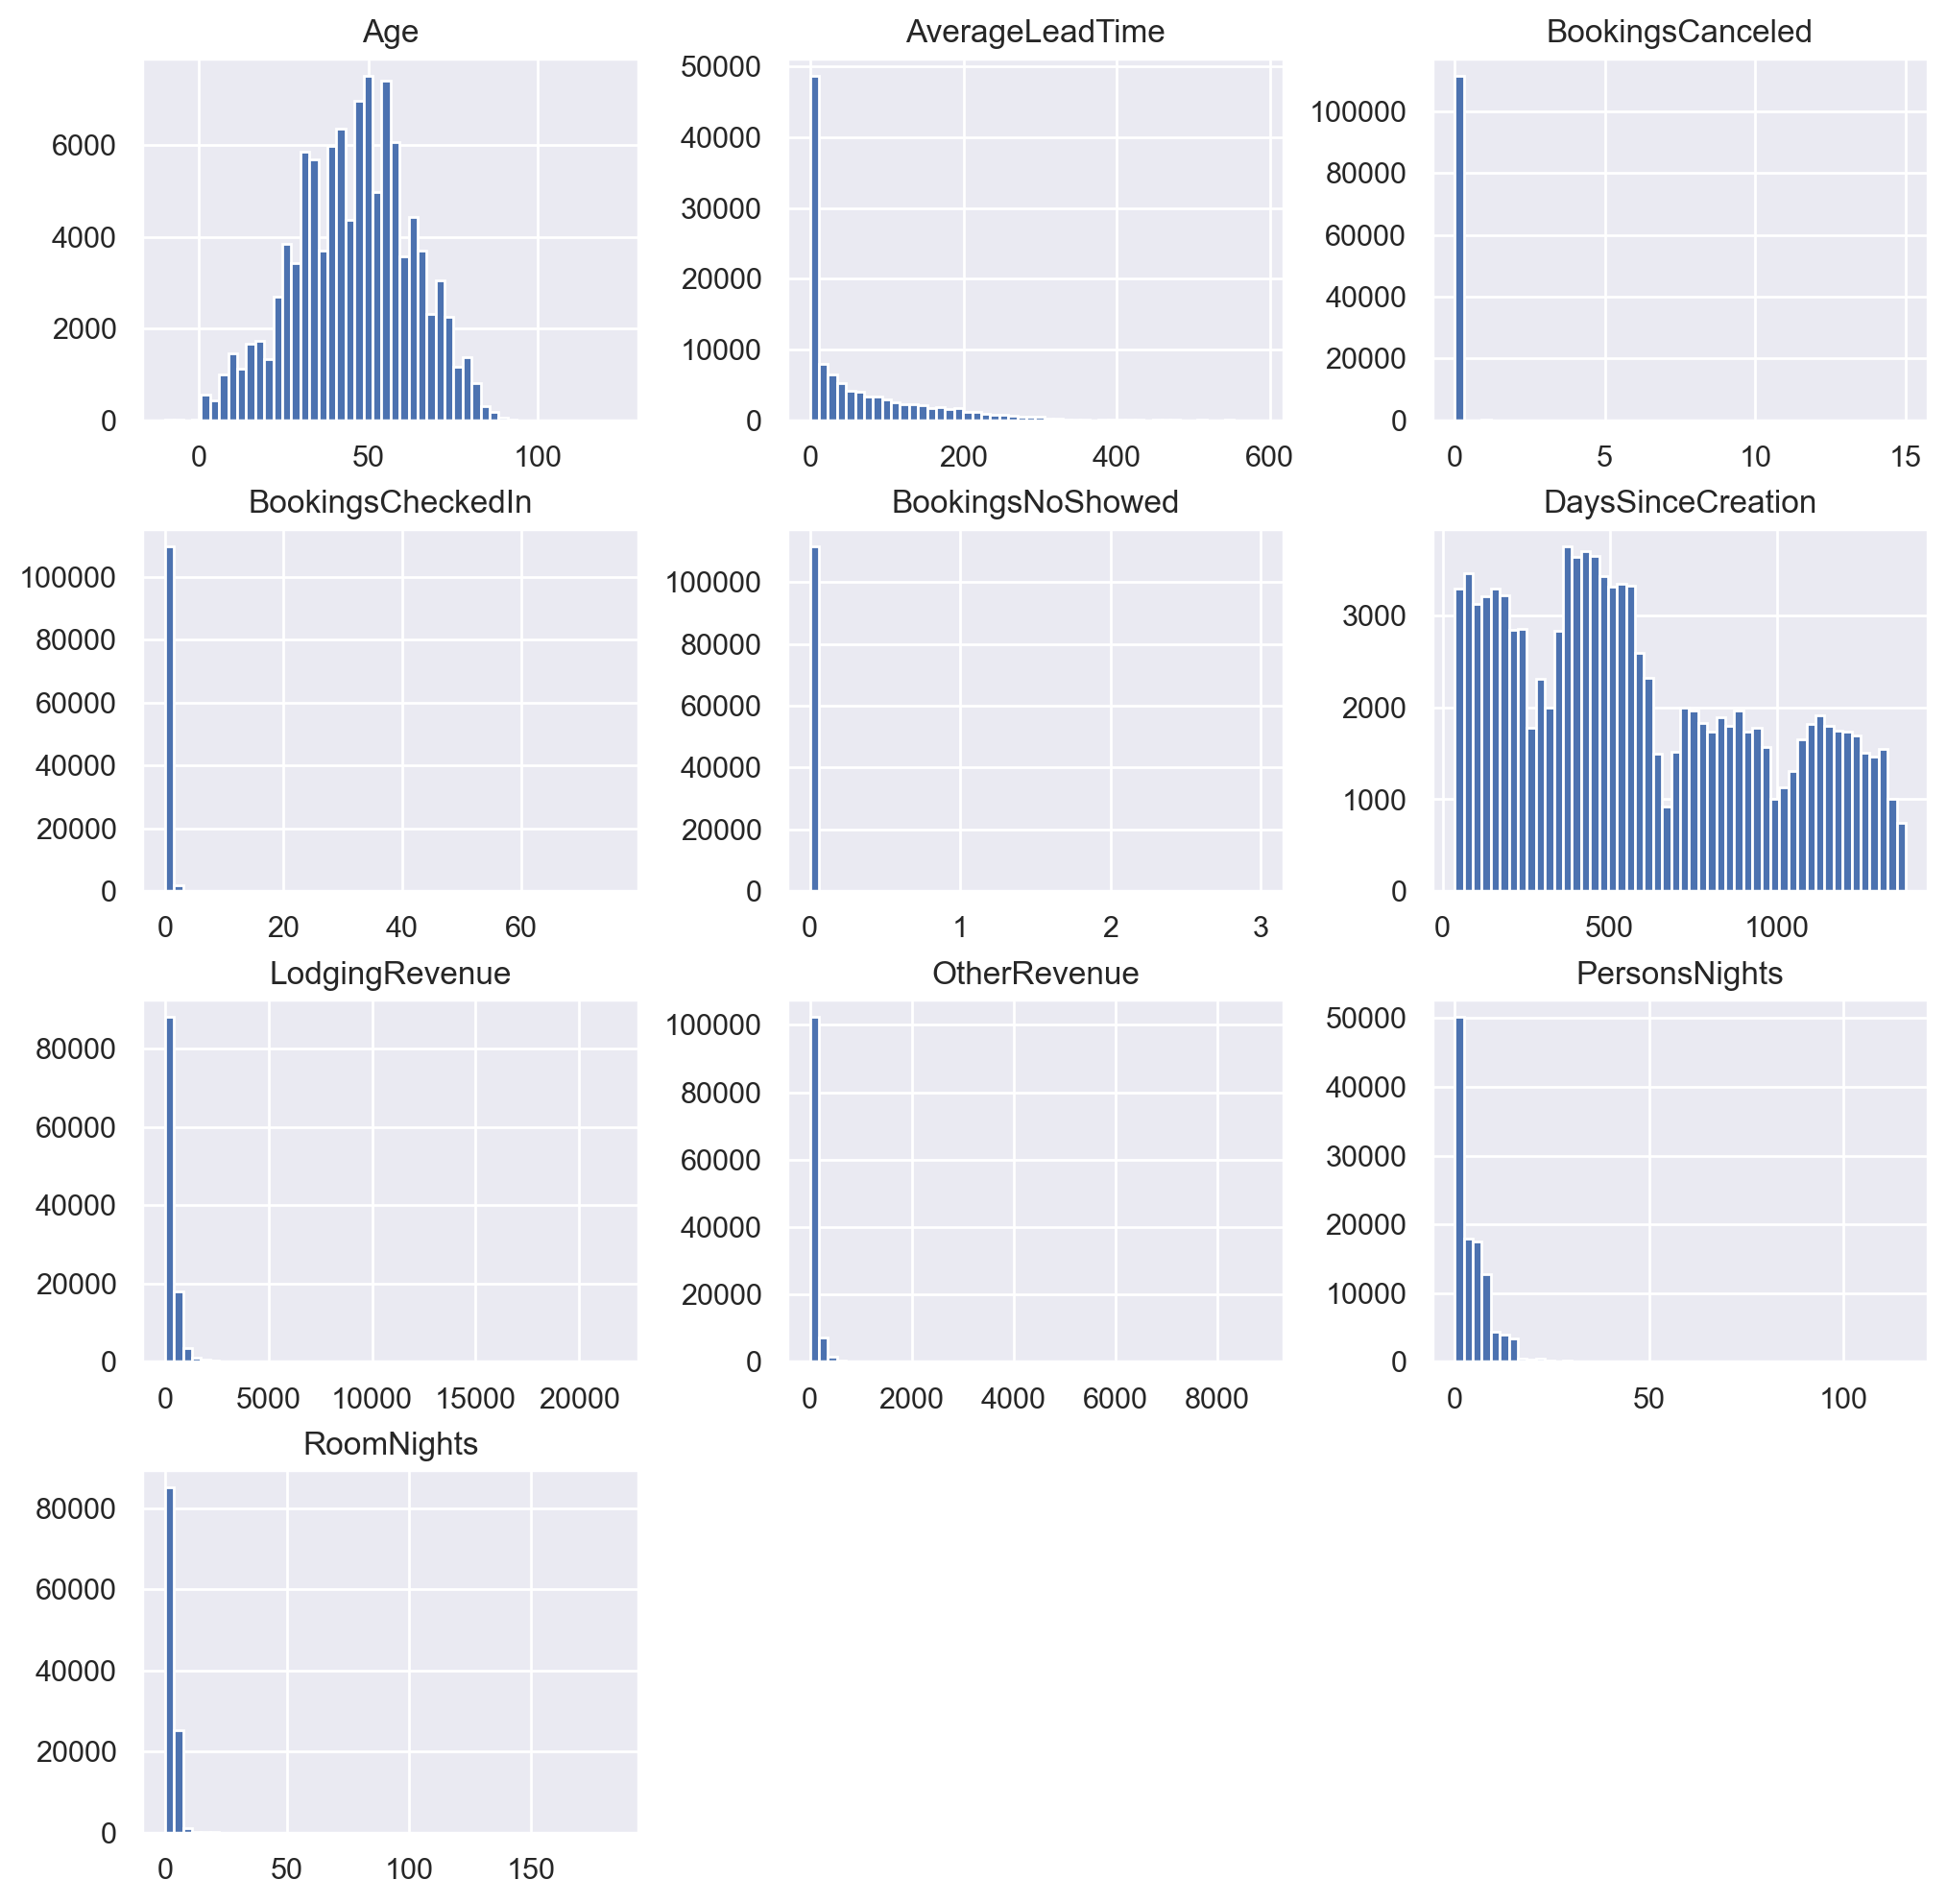

In [63]:
df[numerical].hist(bins=50, figsize=(12,12))
plt.show()


#### 3.3.2 Categorical Variables

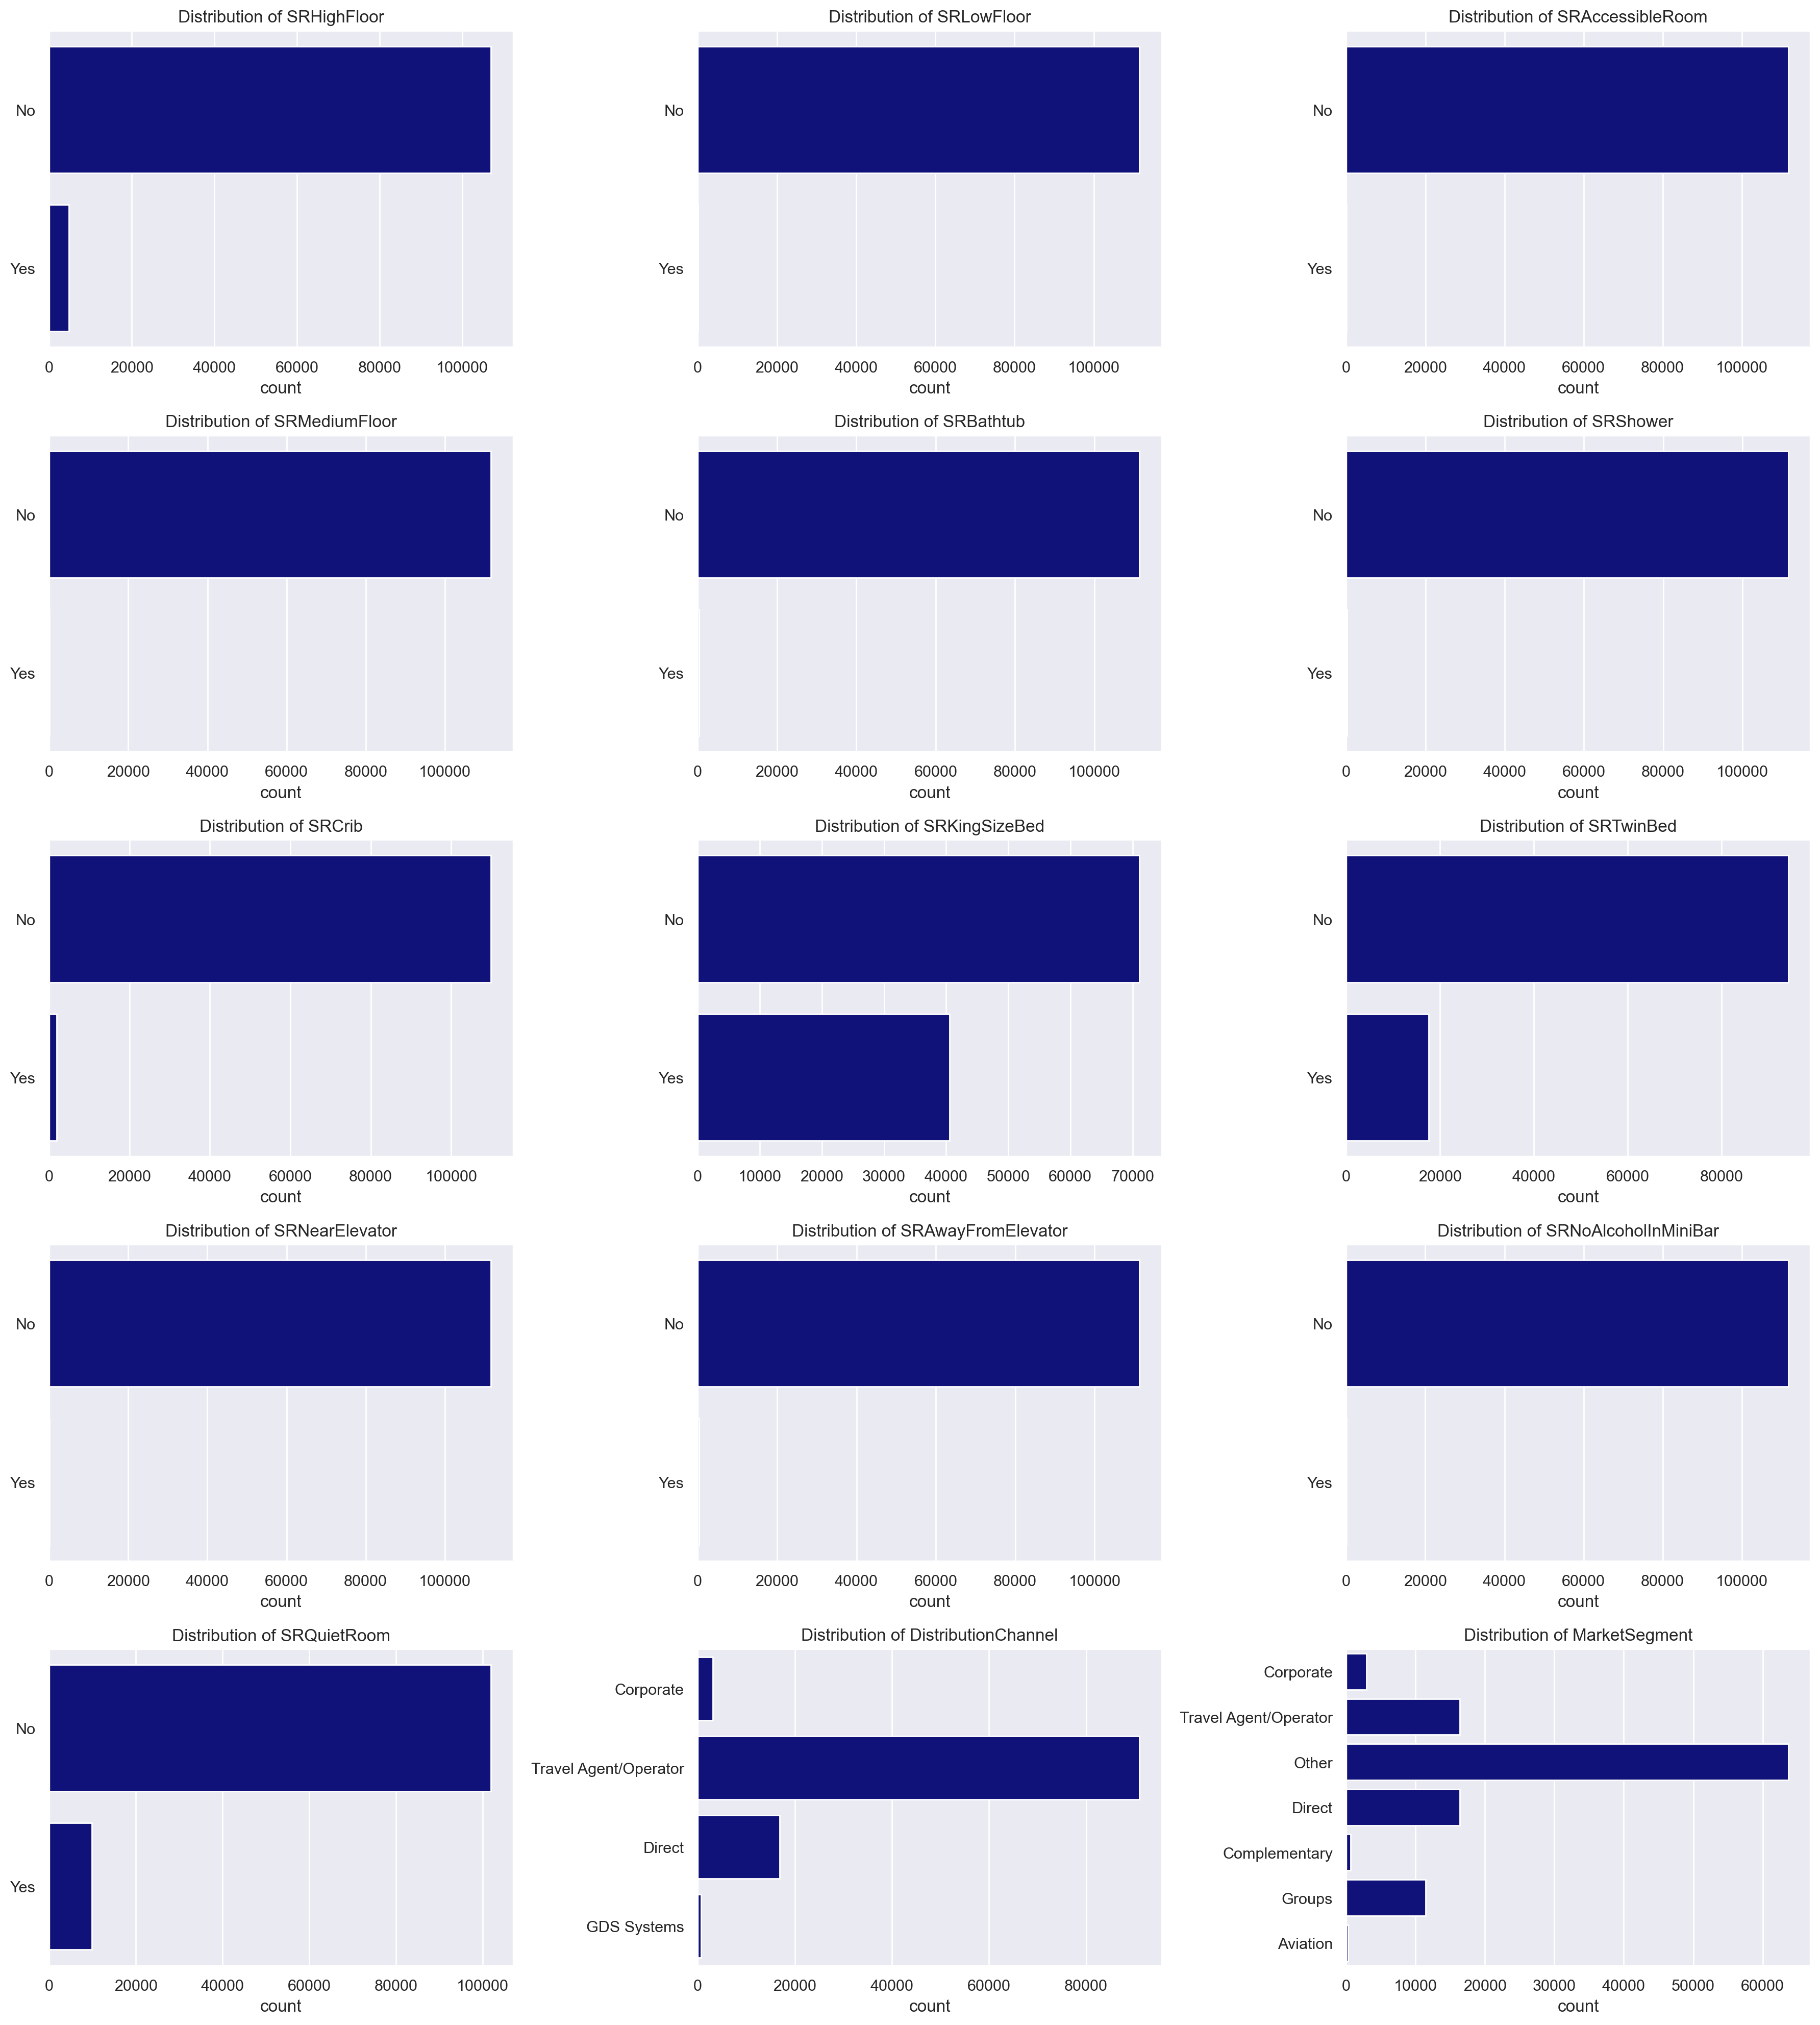

In [64]:
# Create a grid of subplots with 3 plots in each row
fig, axes = plt.subplots(nrows=(len(categorical[:-1]) + 2) // 3, ncols=3, figsize=(18, 4 * ((len(categorical[:-1]) + 2) // 3)))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each non-metric feature and create a countplot
for i, col in enumerate(categorical[:-1]):
    sns.countplot(y=col, data=df[categorical].replace({0: 'No', 1: 'Yes'}), color="darkblue", ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

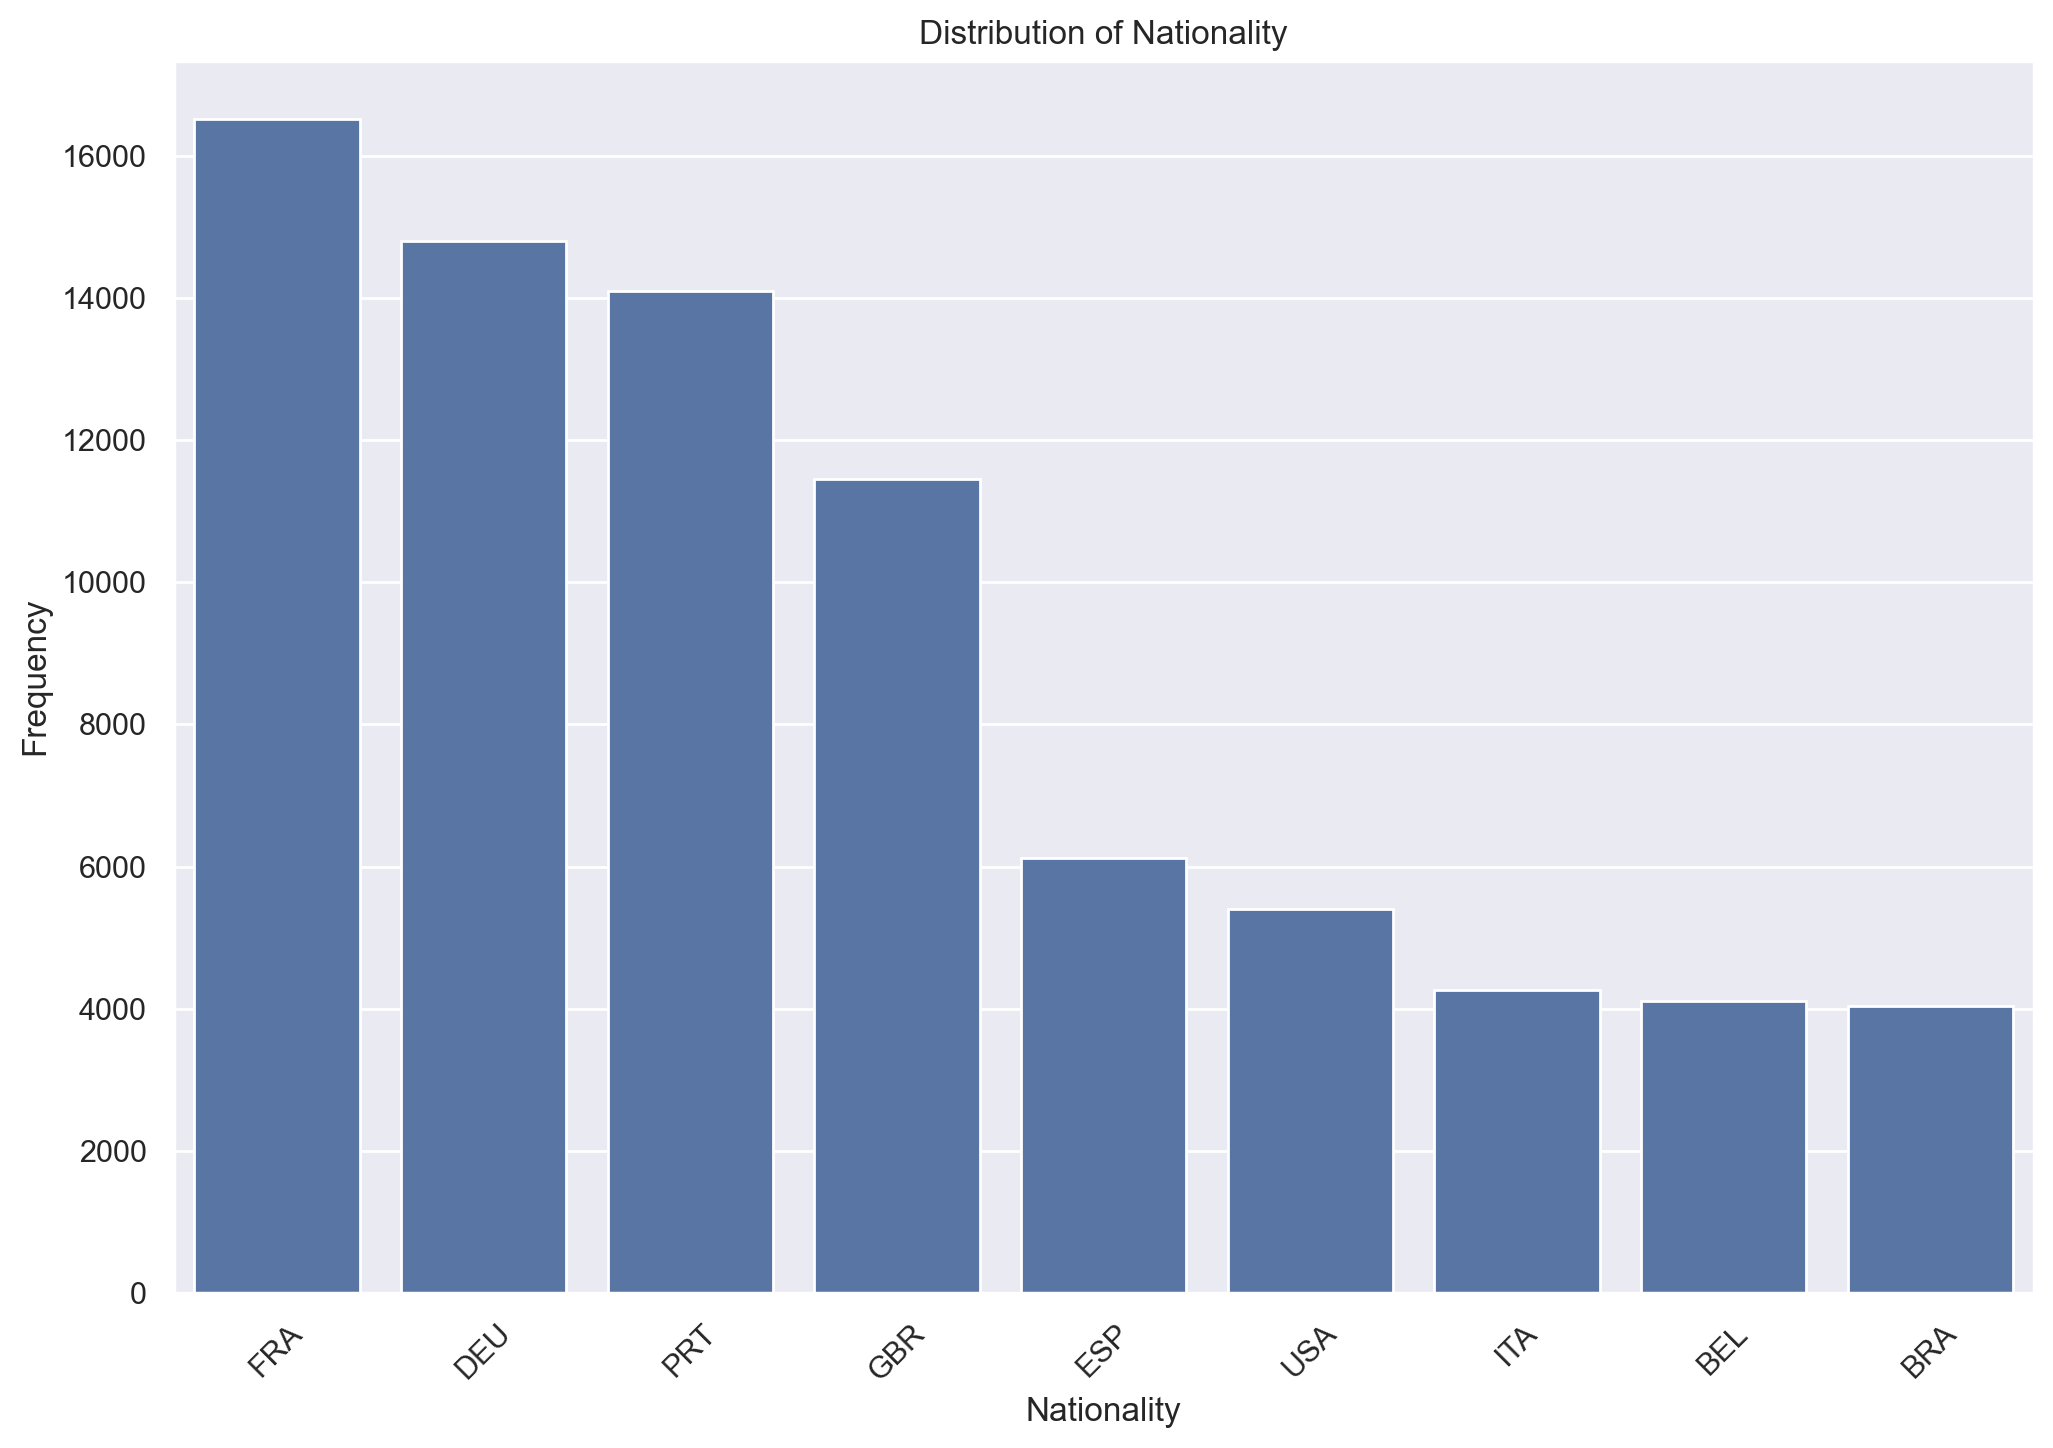

In [65]:
# Calculate the frequency of each nationality
nationality_counts = df['Nationality'].value_counts()

# Define a threshold for grouping less common nationalities
threshold = 4000

# Create a copy of the Nationality column and group less common nationalities into 'Other'
nationality_copy = df['Nationality'].apply(lambda x: x if nationality_counts[x] > threshold else 'Other')

# Calculate the frequency of each grouped nationality
grouped_nationality_counts = nationality_copy.value_counts()

# Exclude the "Other" category
grouped_nationality_counts = grouped_nationality_counts[grouped_nationality_counts.index != 'Other']

# Plot the distribution as a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=grouped_nationality_counts.index, y=grouped_nationality_counts.values)
plt.title('Distribution of Nationality')
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [66]:
# Step 1: Count the number of customers per country
country_counts = df['Nationality'].value_counts().reset_index()
country_counts.columns = ['Nationality', 'CustomerCount']

# Step 2: Create the choropleth map with Mollweide projection
fig = px.choropleth(
    country_counts,  # Data
    locations="Nationality",  # Column with country codes
    locationmode="ISO-3",  # Use ISO-3 country codes (e.g., 'USA', 'GBR')
    color="CustomerCount",  # Column to determine color intensity
    hover_name="Nationality",  # Column to display on hover
    color_continuous_scale="Brwnyl",  # Brown color scale
    title="Customer Distribution by Country (Oval Globe)",  # Map title
    labels={'CustomerCount': 'Number of Customers'},  # Label for the color scale
    projection="mollweide"  # Mollweide projection for oval shape
)

# Step 3: Customize the layout for the oval globe
fig.update_layout(
    geo=dict(
        showframe=False,  # Hide the map frame
        showcoastlines=True,  # Show coastlines
        showland=True,  # Show land
        landcolor="lightgray",  # Color of land
        oceancolor="lightblue",  # Color of oceans
        lakecolor="blue",  # Color of lakes
        projection_type="mollweide"  # Mollweide projection for oval shape
    ),
    title_font=dict(size=24, color="brown"),  # Title font and color
    coloraxis_colorbar=dict(title="Customer Count", tickfont=dict(color="brown"))  # Color bar customization
)

# Step 4: Add country borders and resolution
fig.update_geos(
    resolution=110,  # Map resolution
    showcountries=True,  # Show country borders
    countrycolor="black"  # Color of country borders
)

# Step 5: Display the map
fig.show()

### 3.5 Checking for missing values

In [67]:
pd.DataFrame(df.isna().sum().rename('Missing Values Count'))

Missing Values Count
Nationality                              0
Age                                   4172
DaysSinceCreation                        0
AverageLeadTime                          0
LodgingRevenue                           0
OtherRevenue                             0
BookingsCanceled                         0
BookingsNoShowed                         0
BookingsCheckedIn                        0
PersonsNights                            0
RoomNights                               0
DistributionChannel                      0
MarketSegment                            0
SRHighFloor                              0
SRLowFloor                               0
SRAccessibleRoom                         0
SRMediumFloor                            0
SRBathtub                                0
SRShower                                 0
SRCrib                                   0
SRKingSizeBed                            0
SRTwinBed                                0
SRNearElevator                           0
SRAwayFromElevator                       0
SRNoAlcoholInMiniBar                     0
SRQuietRoom                              0

### 3.6 Checking for duplicated rows

In [68]:
df[df.duplicated()]

Nationality   Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
ID                                                                             
40             PRT   NaN               1385                0             0.0   
69             FRA  52.0               1385                0             0.0   
99             ESP  58.0               1384                0             0.0   
138            FRA  73.0               1384               97           192.0   
146            FRA  61.0               1384                0             0.0   
...            ...   ...                ...              ...             ...   
111610         GBR  25.0                 38                0             0.0   
111633         GBR  58.0                 37              223           674.0   
111635         PRT   NaN                 37                0             0.0   
111681         CAN  60.0                 37                0             0.0   
111692         CAN  60.0                 37                0             0.0   

        OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
ID                                                                            
40               0.0                 0                 0                  1   
69               0.0                 0                 0                  0   
99               0.0                 0                 0                  0   
138             50.0                 0                 0                  1   
146              0.0                 0                 0                  0   
...              ...               ...               ...                ...   
111610           0.0                 0                 0                  0   
111633          80.0                 0                 0                  1   
111635           0.0                 0                 0                  0   
111681           0.0                 0                 0                  0   
111692           0.0                 0                 0                  0   

        PersonsNights  RoomNights    DistributionChannel  \
ID                                                         
40                  1           1                 Direct   
69                  0           0  Travel Agent/Operator   
99                  0           0  Travel Agent/Operator   
138                 8           4  Travel Agent/Operator   
146                 0           0  Travel Agent/Operator   
...               ...         ...                    ...   
111610              0           0  Travel Agent/Operator   
111633             10           5  Travel Agent/Operator   
111635              0           0  Travel Agent/Operator   
111681              0           0  Travel Agent/Operator   
111692              0           0  Travel Agent/Operator   

                MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
ID                                                                         
40              Complementary            0           0                 0   
69      Travel Agent/Operator            0           0                 0   
99                      Other            0           0                 0   
138     Travel Agent/Operator            0           0                 0   
146     Travel Agent/Operator            0           0                 0   
...                       ...          ...         ...               ...   
111610                  Other            0           0                 0   
111633                  Other            0           0                 0   
111635                  Other            0           0                 0   
111681                 Groups            0           0                 0   
111692                 Groups            0           0                 0   

        SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
ID                                                                             
40      

### 3.7 Checking for outliers

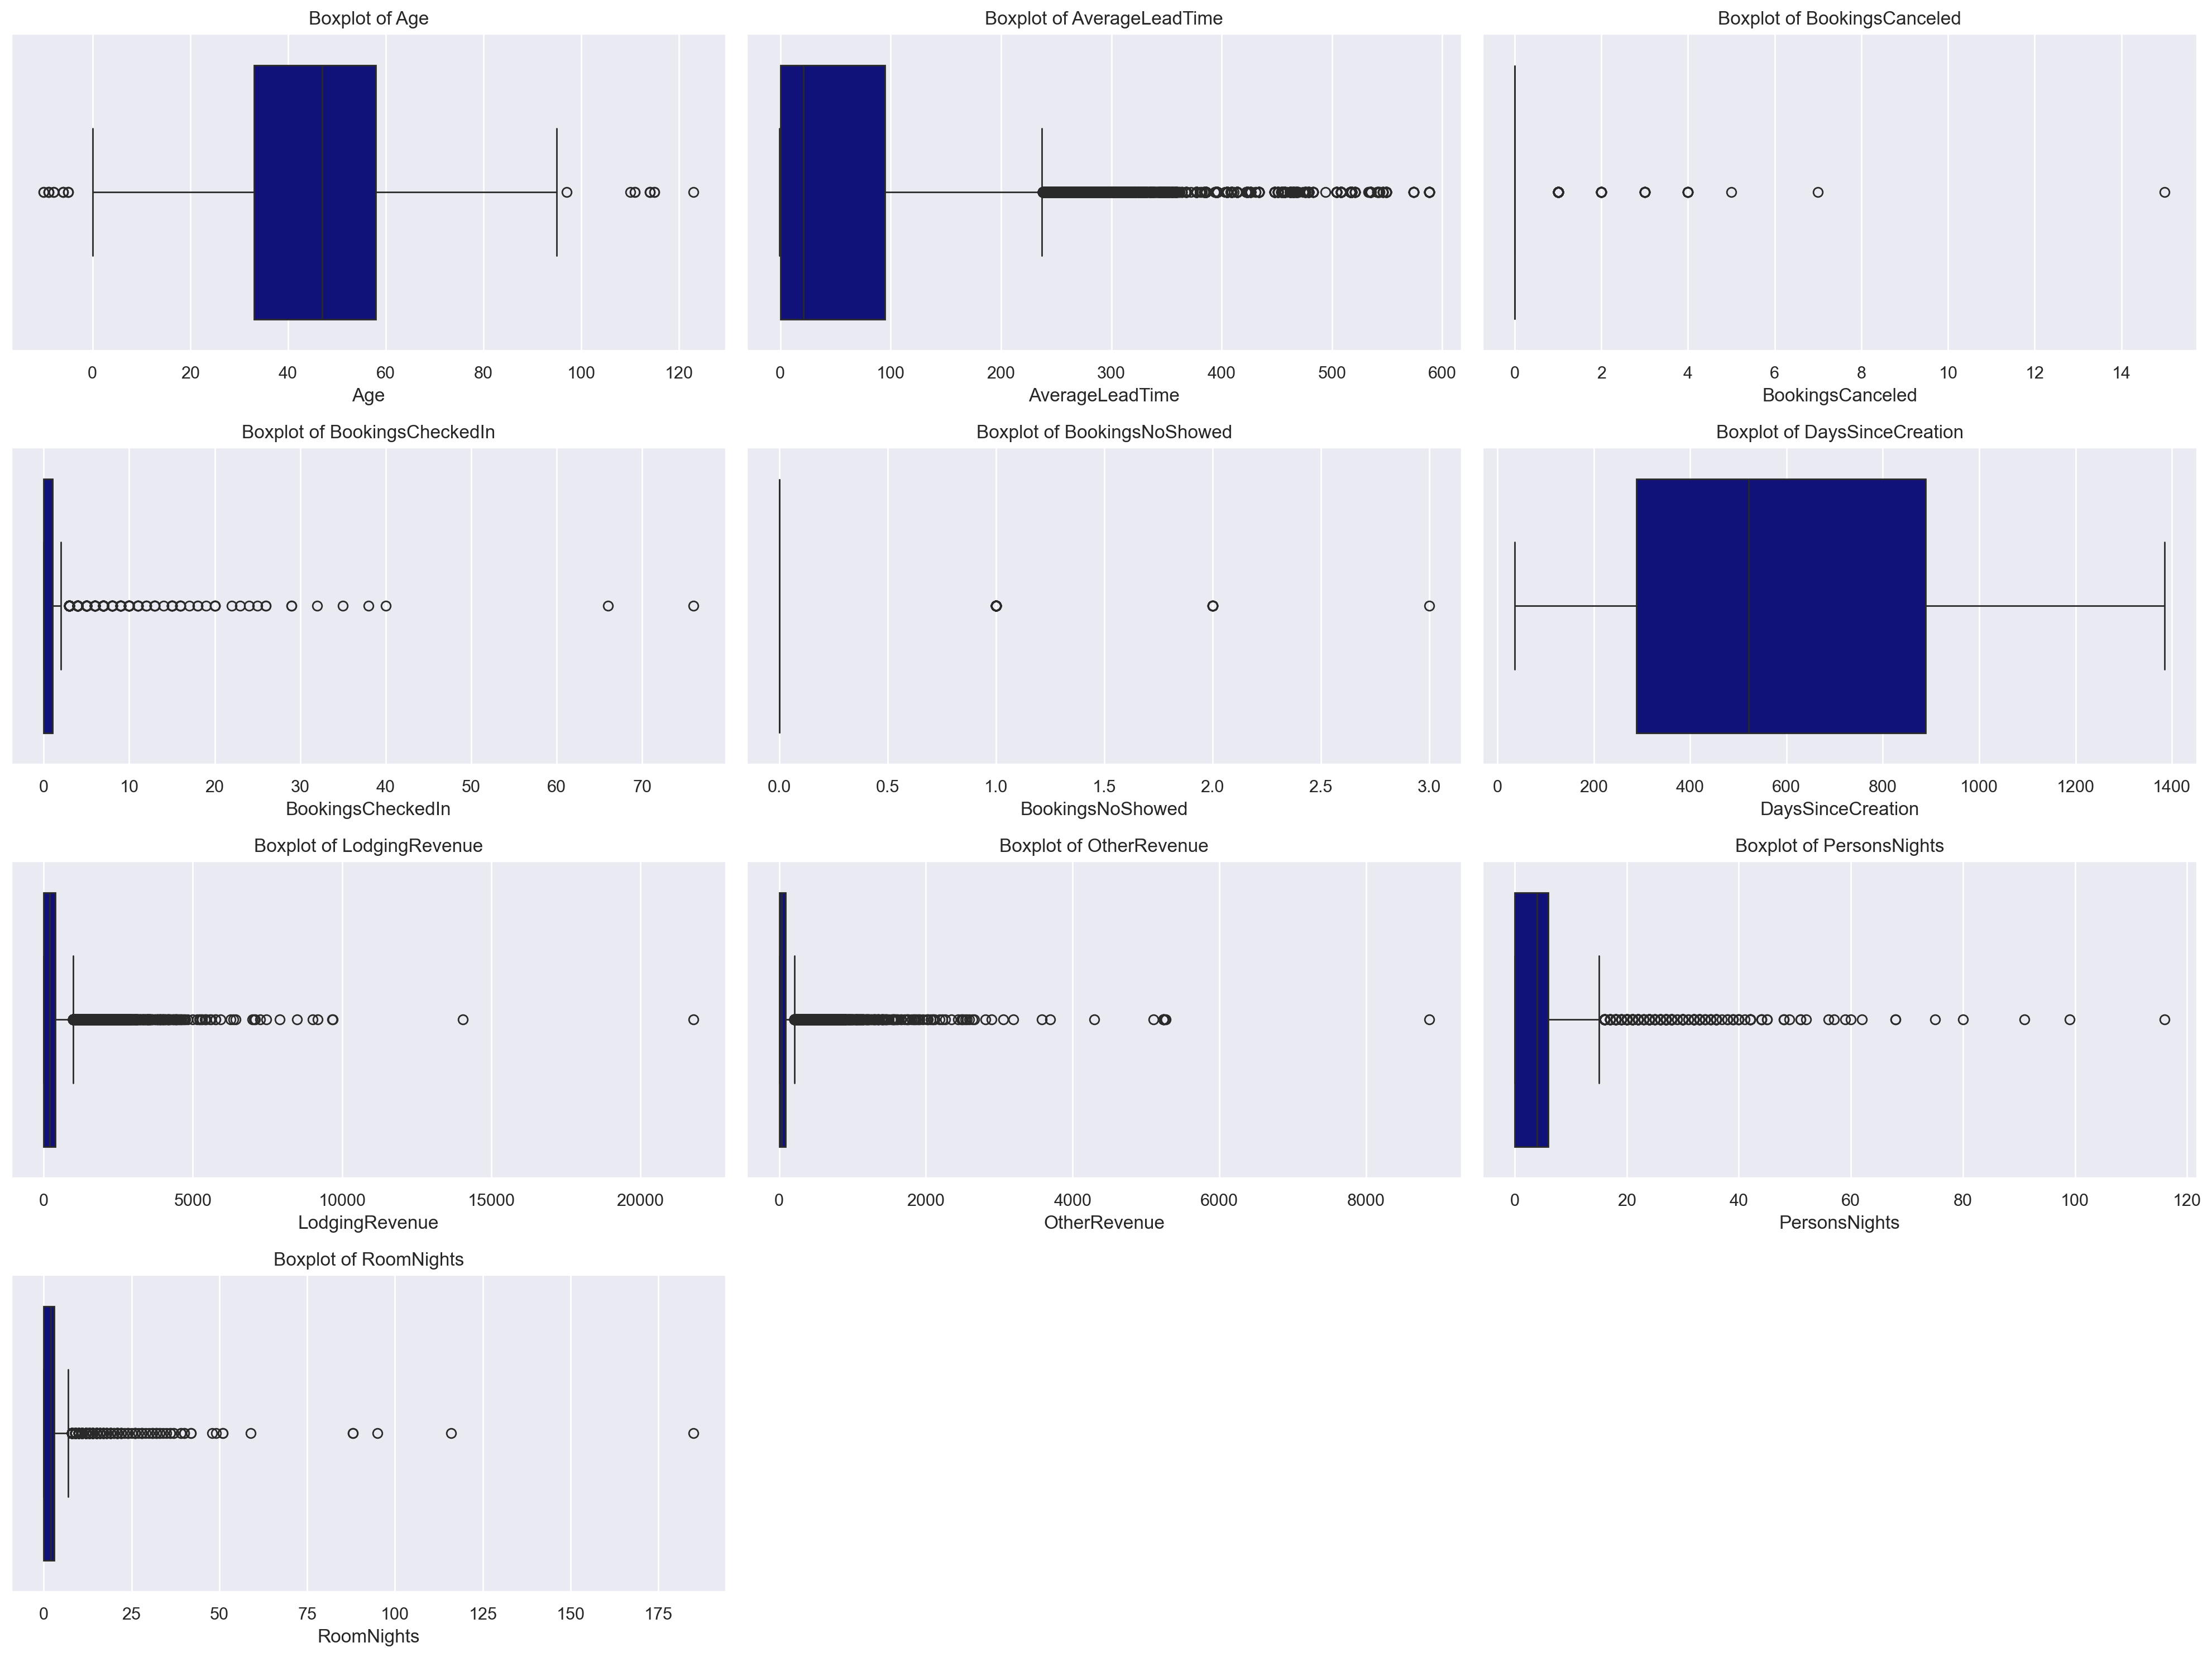

In [69]:
# Create a boxplot for all numerical columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical feature and create a horizontal boxplot
for i, col in enumerate(numerical):
    sns.boxplot(x=col, data=df, color="darkblue", ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 3.8 Vizualizing Anomalies and Strage Cases

#### Negative and under 18 age values

In [70]:
df[df['Age'] < 18]

Nationality   Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
ID                                                                             
35             PRT   4.0               1385                0             0.0   
68             FRA  14.0               1385                0             0.0   
82             ESP   4.0               1384              103           653.4   
88             ESP   7.0               1384                0             0.0   
111            FRA  14.0               1384                0             0.0   
...            ...   ...                ...              ...             ...   
111488         DEU  15.0                 39               31          2436.0   
111495         ESP   8.0                 39                0             0.0   
111541         PRT   7.0                 39                0             0.0   
111642         PRT  15.0                 37                0             0.0   
111683         BRA   1.0                 37                0             0.0   

        OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
ID                                                                            
35               0.0                 0                 0                  0   
68               0.0                 0                 0                  0   
82             759.6                 0                 0                  1   
88               0.0                 0                 0                  0   
111              0.0                 0                 0                  0   
...              ...               ...               ...                ...   
111488         247.5                 0                 0                  1   
111495           0.0                 0                 0                  0   
111541           0.0                 0                 0                  0   
111642           0.0                 0                 0                  0   
111683           0.0                 0                 0                  0   

        PersonsNights  RoomNights    DistributionChannel  \
ID                                                         
35                  0           0                 Direct   
68                  0           0  Travel Agent/Operator   
82                  8           4                 Direct   
88                  0           0                 Direct   
111                 0           0                 Direct   
...               ...         ...                    ...   
111488              4           4  Travel Agent/Operator   
111495              0           0  Travel Agent/Operator   
111541              0           0  Travel Agent/Operator   
111642              0           0                 Direct   
111683              0           0  Travel Agent/Operator   

                MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
ID                                                                         
35                     Direct            0           0                 0   
68      Travel Agent/Operator            0           0                 0   
82                     Direct            0           0                 0   
88                     Direct            0           0                 0   
111                    Direct            0           0                 0   
...                       ...          ...         ...               ...   
111488                  Other            0           0                 0   
111495                  Other            0           0                 0   
111541                  Other            0           0                 0   
111642                 Direct            1           0                 0   
111683                  Other            0           0                 0   

        SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
ID                                                                             
35      

#### Negative AverageLeadTime

In [71]:
df[df['AverageLeadTime'] < 0]

Nationality   Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
ID                                                                             
23064          PRT   NaN                964               -1          352.00   
29374          USA  25.0                870               -1           77.49   
51375          CHN  33.0                558               -1          129.00   
58655          FRA  57.0                499               -1          149.00   
58662          FRA  62.0                499               -1          149.00   
58676          FRA  61.0                499               -1          149.00   
60590          ESP  46.0                485               -1          159.00   
62690          USA  70.0                468               -1           95.20   
68486          GBR  46.0                424               -1          282.00   
72709          BRA  31.0                394               -1          209.00   
110728         NLD  28.0                 45               -1          227.00   
111563         DEU  77.0                 38               -1           71.50   
111564         ISL  38.0                 38               -1           71.50   

        OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
ID                                                                            
23064           30.0                 0                 0                  1   
29374            3.0                 0                 0                  1   
51375            2.0                 0                 0                  1   
58655            2.0                 0                 0                  1   
58662            2.0                 0                 0                  1   
58676            2.0                 0                 0                  1   
60590            2.0                 0                 0                  1   
62690            2.0                 0                 0                  1   
68486           24.0                 0                 0                  1   
72709            2.0                 0                 0                  1   
110728          16.0                 0                 0                  1   
111563           4.0                 0                 0                  1   
111564           4.0                 0                 0                  1   

        PersonsNights  RoomNights    DistributionChannel MarketSegment  \
ID                                                                       
23064               2           1  Travel Agent/Operator         Other   
29374               3           1  Travel Agent/Operator         Other   
51375               2           1  Travel Agent/Operator         Other   
58655               2           1  Travel Agent/Operator         Other   
58662               2           1  Travel Agent/Operator         Other   
58676               2           1  Travel Agent/Operator         Other   
60590               2           1  Travel Agent/Operator         Other   
62690               2           1  Travel Agent/Operator         Other   
68486               4           1  Travel Agent/Operator         Other   
72709               2           1  Travel Agent/Operator         Other   
110728              2           1  Travel Agent/Operator         Other   
111563              2           1  Travel Agent/Operator         Other   
111564              2           1  Travel Agent/Operator         Other   

        SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  SRBathtub  \
ID                                                                            
23064             0           0                 0              0          0   
29374             0           0                 0              0          0   
51375             0           0                 0              0          0   
58655             0           0                 0              0          0   
58662             0           0    

#### Revenue without Check-in

In [72]:
df[((df['BookingsCheckedIn'] == 0)) & ((df['LodgingRevenue'] > 0) | (df['OtherRevenue'] > 0))]

Nationality  Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
ID                                                                           
70580         PRT  NaN                410              114           249.3   

       OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
ID                                                                           
70580          18.0                 0                 0                  0   

       PersonsNights  RoomNights    DistributionChannel MarketSegment  \
ID                                                                      
70580              0           0  Travel Agent/Operator         Other   

       SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  SRBathtub  \
ID                                                                           
70580            0           0                 0              0          0   

       SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
ID                                                                  
70580         0       0              0          0               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                            
70580                   0                     0            0

#### More Rooms than Persons

In [73]:
df[df['RoomNights'] > df['PersonsNights']]

Nationality   Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
ID                                                                             
2160           PRT  48.0               1323               20         8493.65   
2757           PRT   NaN               1315               57        21781.00   
2843           PRT   NaN               1314                8            0.00   
4196           PRT  45.0               1288               75          138.00   
10151          PRT  66.0               1189               42          826.00   
15416          PRT  49.0               1112                0          858.15   
18978          USA  47.0               1057               17          140.82   
25309          ESP  52.0                929                7         2114.00   
26826          PRT  38.0                905               18          297.00   
27111          GRC  52.0                901                7         3066.00   
27782          HRV  43.0                892               10         1136.00   
38569          ESP  50.0                736               14          905.00   
39121          PRT  63.0                729               17          360.00   
41476          PRT  51.0                693               12         1009.00   
43674          NLD  33.0                641               41          267.00   
44740          PRT   NaN                625                6          683.00   
51203          PRT  46.0                560               14          537.00   
60010          PRT  34.0                489                0          459.00   
62974          PRT  46.0                466                3          269.00   
68179          PRT   NaN                426               97         3123.00   
75056          ESP   NaN                377               69          488.00   
80037          BRA  35.0                336               63          242.00   
81408          BRA  33.0                319                0          524.87   
85781          USA  67.0                259                1          314.40   
85785          BRA  53.0                259                0          315.00   
90375          DEU  52.0                214               36         2514.00   
97339          ISR  31.0                155                0          119.20   
103421         PRT   NaN                103                5          492.00   

        OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
ID                                                                            
2160         2587.50                 3                 1                 66   
2757         1584.00                 1                 0                 29   
2843         5105.50                 0                 0                  3   
4196           38.50                 0                 0                  2   
10151         173.00                 3                 0                 13   
15416         114.00                 0                 0                  3   
18978           6.00                 0                 0                  2   
25309         376.60                 1                 0                  7   
26826         172.90                 0                 0                  7   
27111         347.30                 0                 0                  5   
27782         146.20                 0                 0                  3   
38569          50.00                 0                 0                  3   
39121          84.50                 1                 1                  4   
41476         134.00                 2                 0                  7   
43674         109.00                 0                 0                  1   
44740        1734.50                 0                 0                  4   
51203         195.00                 1                 1                  7   
60010          42.00                 0                 0                  2   
62974           7.00      

### 3.9 Vizualizing Duplicate Rows

In [74]:
# Show duplicates
df[df.duplicated()]

Nationality   Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
ID                                                                             
40             PRT   NaN               1385                0             0.0   
69             FRA  52.0               1385                0             0.0   
99             ESP  58.0               1384                0             0.0   
138            FRA  73.0               1384               97           192.0   
146            FRA  61.0               1384                0             0.0   
...            ...   ...                ...              ...             ...   
111610         GBR  25.0                 38                0             0.0   
111633         GBR  58.0                 37              223           674.0   
111635         PRT   NaN                 37                0             0.0   
111681         CAN  60.0                 37                0             0.0   
111692         CAN  60.0                 37                0             0.0   

        OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
ID                                                                            
40               0.0                 0                 0                  1   
69               0.0                 0                 0                  0   
99               0.0                 0                 0                  0   
138             50.0                 0                 0                  1   
146              0.0                 0                 0                  0   
...              ...               ...               ...                ...   
111610           0.0                 0                 0                  0   
111633          80.0                 0                 0                  1   
111635           0.0                 0                 0                  0   
111681           0.0                 0                 0                  0   
111692           0.0                 0                 0                  0   

        PersonsNights  RoomNights    DistributionChannel  \
ID                                                         
40                  1           1                 Direct   
69                  0           0  Travel Agent/Operator   
99                  0           0  Travel Agent/Operator   
138                 8           4  Travel Agent/Operator   
146                 0           0  Travel Agent/Operator   
...               ...         ...                    ...   
111610              0           0  Travel Agent/Operator   
111633             10           5  Travel Agent/Operator   
111635              0           0  Travel Agent/Operator   
111681              0           0  Travel Agent/Operator   
111692              0           0  Travel Agent/Operator   

                MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
ID                                                                         
40              Complementary            0           0                 0   
69      Travel Agent/Operator            0           0                 0   
99                      Other            0           0                 0   
138     Travel Agent/Operator            0           0                 0   
146     Travel Agent/Operator            0           0                 0   
...                       ...          ...         ...               ...   
111610                  Other            0           0                 0   
111633                  Other            0           0                 0   
111635                  Other            0           0                 0   
111681                 Groups            0           0                 0   
111692                 Groups            0           0                 0   

        SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
ID                                                                             
40      

# 4 Data Preparation

In [75]:
X = df.copy(deep=True)

## 4.1 Removing Duplicates

In [76]:
# Drop duplicates
X.drop_duplicates(inplace=True)

## 4.2 Imputing Missing Values

### Age

> Let's impute customer age with KNN imputer.

In [77]:
# Create a copy of the DataFrame for imputation
df_to_impute = X.copy(deep=True)

# Replace values lower than 0 with NaN for imputation
df_to_impute['Age'] = df_to_impute['Age'].apply(lambda x: np.nan if x < 0 else x)

# Step 1: Scale the 'Age' column
scaler = StandardScaler()
df_to_impute['Age'] = scaler.fit_transform(df_to_impute[['Age']])

# Step 2: Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_to_impute['Age'] = imputer.fit_transform(df_to_impute[['Age']])

# Step 3: Reverse scaling for interpretability
df_to_impute['Age'] = scaler.inverse_transform(df_to_impute[['Age']])

# Step 4: Round 'Age' to the nearest integer
df_to_impute["Age"] = df_to_impute["Age"].round().astype(int)

# Step 5: Update the original DataFrame with the imputed values
X[numerical] = df_to_impute[numerical]

print(f"Total number of missing values: {X.isna().sum().sum()}")

Total number of missing values: 0


## 4.3 Anomalies

In [78]:
# Filter the dataframe for specific conditions
anomalies = (X[(X['Age'] < 18) |
              (X['AverageLeadTime'] < 0) |
              ((X['BookingsCheckedIn'] == 0) &
               ((X['LodgingRevenue'] > 0) | (X['OtherRevenue'] > 0))) |
             (X['RoomNights'] > X['PersonsNights'])])

# Display the filtered dataframe
anomalies.head()

Nationality  Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
ID                                                                         
35          PRT    4               1385                0             0.0   
68          FRA   14               1385                0             0.0   
82          ESP    4               1384              103           653.4   
88          ESP    7               1384                0             0.0   
111         FRA   14               1384                0             0.0   

     OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
ID                                                                         
35            0.0                 0                 0                  0   
68            0.0                 0                 0                  0   
82          759.6                 0                 0                  1   
88            0.0                 0                 0                  0   
111           0.0                 0                 0                  0   

     PersonsNights  RoomNights    DistributionChannel          MarketSegment  \
ID                                                                             
35               0           0                 Direct                 Direct   
68               0           0  Travel Agent/Operator  Travel Agent/Operator   
82               8           4                 Direct                 Direct   
88               0           0                 Direct                 Direct   
111              0           0                 Direct                 Direct   

     SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  SRBathtub  \
ID                                                                         
35             0           0                 0              0          0   
68             0           0                 0              0          0   
82             0           0                 0              0          0   
88             0           0                 0              0          0   
111            0           0                 0              0          0   

     SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
ID                                                                
35          0       1              0          0               0   
68          0       0              0          0               0   
82          0       1              1          0               0   
88          0       0              1          0               0   
111         0       0              0          0               0   

     SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                          
35                    0                     0            0  
68                    0                     0            0  
82                    0                     0            0  
88                    0                     0            0  
111                   0                     0            0

Dropping the anomalies

In [79]:
X.drop(anomalies.index, inplace=True)

## 4.4 Feature Engineering

### 4.4.1 Numerical new features

In [80]:
X['TotalRevenue'] = X['LodgingRevenue'] + X['OtherRevenue']
X['LuxuryInclination'] = X['SRKingSizeBed'] + X['SRBathtub'] + X['SRQuietRoom']/3
X['BudgetInclination'] = X['SRTwinBed'] + X['SRNoAlcoholInMiniBar'] + X['SRLowFloor']/3
X['SpendingPerCheckin'] = np.where(X['BookingsCheckedIn'] == 0, 0,
                                   X['TotalRevenue'] / X['BookingsCheckedIn'])
X['RoomDensity'] = np.where(X['RoomNights'] == 0, 0,
                            X['PersonsNights'] / X['RoomNights'])
X['AvgSpendingPerDay'] = X['TotalRevenue'] / X['DaysSinceCreation']

X['TotalBookings'] = X['BookingsCanceled'] + X['BookingsCheckedIn'] + X['BookingsNoShowed']

X['CancellationRate'] = np.where(
    X['TotalBookings'] == 0,
    0,
    X['BookingsCanceled'] / X['TotalBookings'])

X['NoShowRate'] = np.where(
    X['TotalBookings'] == 0,
    0,
    X['BookingsNoShowed'] / X['TotalBookings'])

# Create Average Stay Length feature
X['Average_Stay_Length'] = np.where(
    X['BookingsCheckedIn'] == 0,
    0,
    X['PersonsNights'] / X['BookingsCheckedIn'])

X['Total_Revenue_Per_Stay'] = np.where(
    X['BookingsCheckedIn'] == 0,
    0,
    (X['LodgingRevenue'] + X['OtherRevenue']) / X['BookingsCheckedIn'])

# Revenue Ratio
X['Revenue_Ratio'] = np.where(
    X['LodgingRevenue'] == 0,
    0,
    X['OtherRevenue'] / X['LodgingRevenue'])

numerical = numerical + ['TotalRevenue', 'LuxuryInclination', 'BudgetInclination', 'SpendingPerCheckin', 'RoomDensity', 'AvgSpendingPerDay', 'TotalBookings', 'CancellationRate', 'NoShowRate', 'Average_Stay_Length', 'Revenue_Ratio']

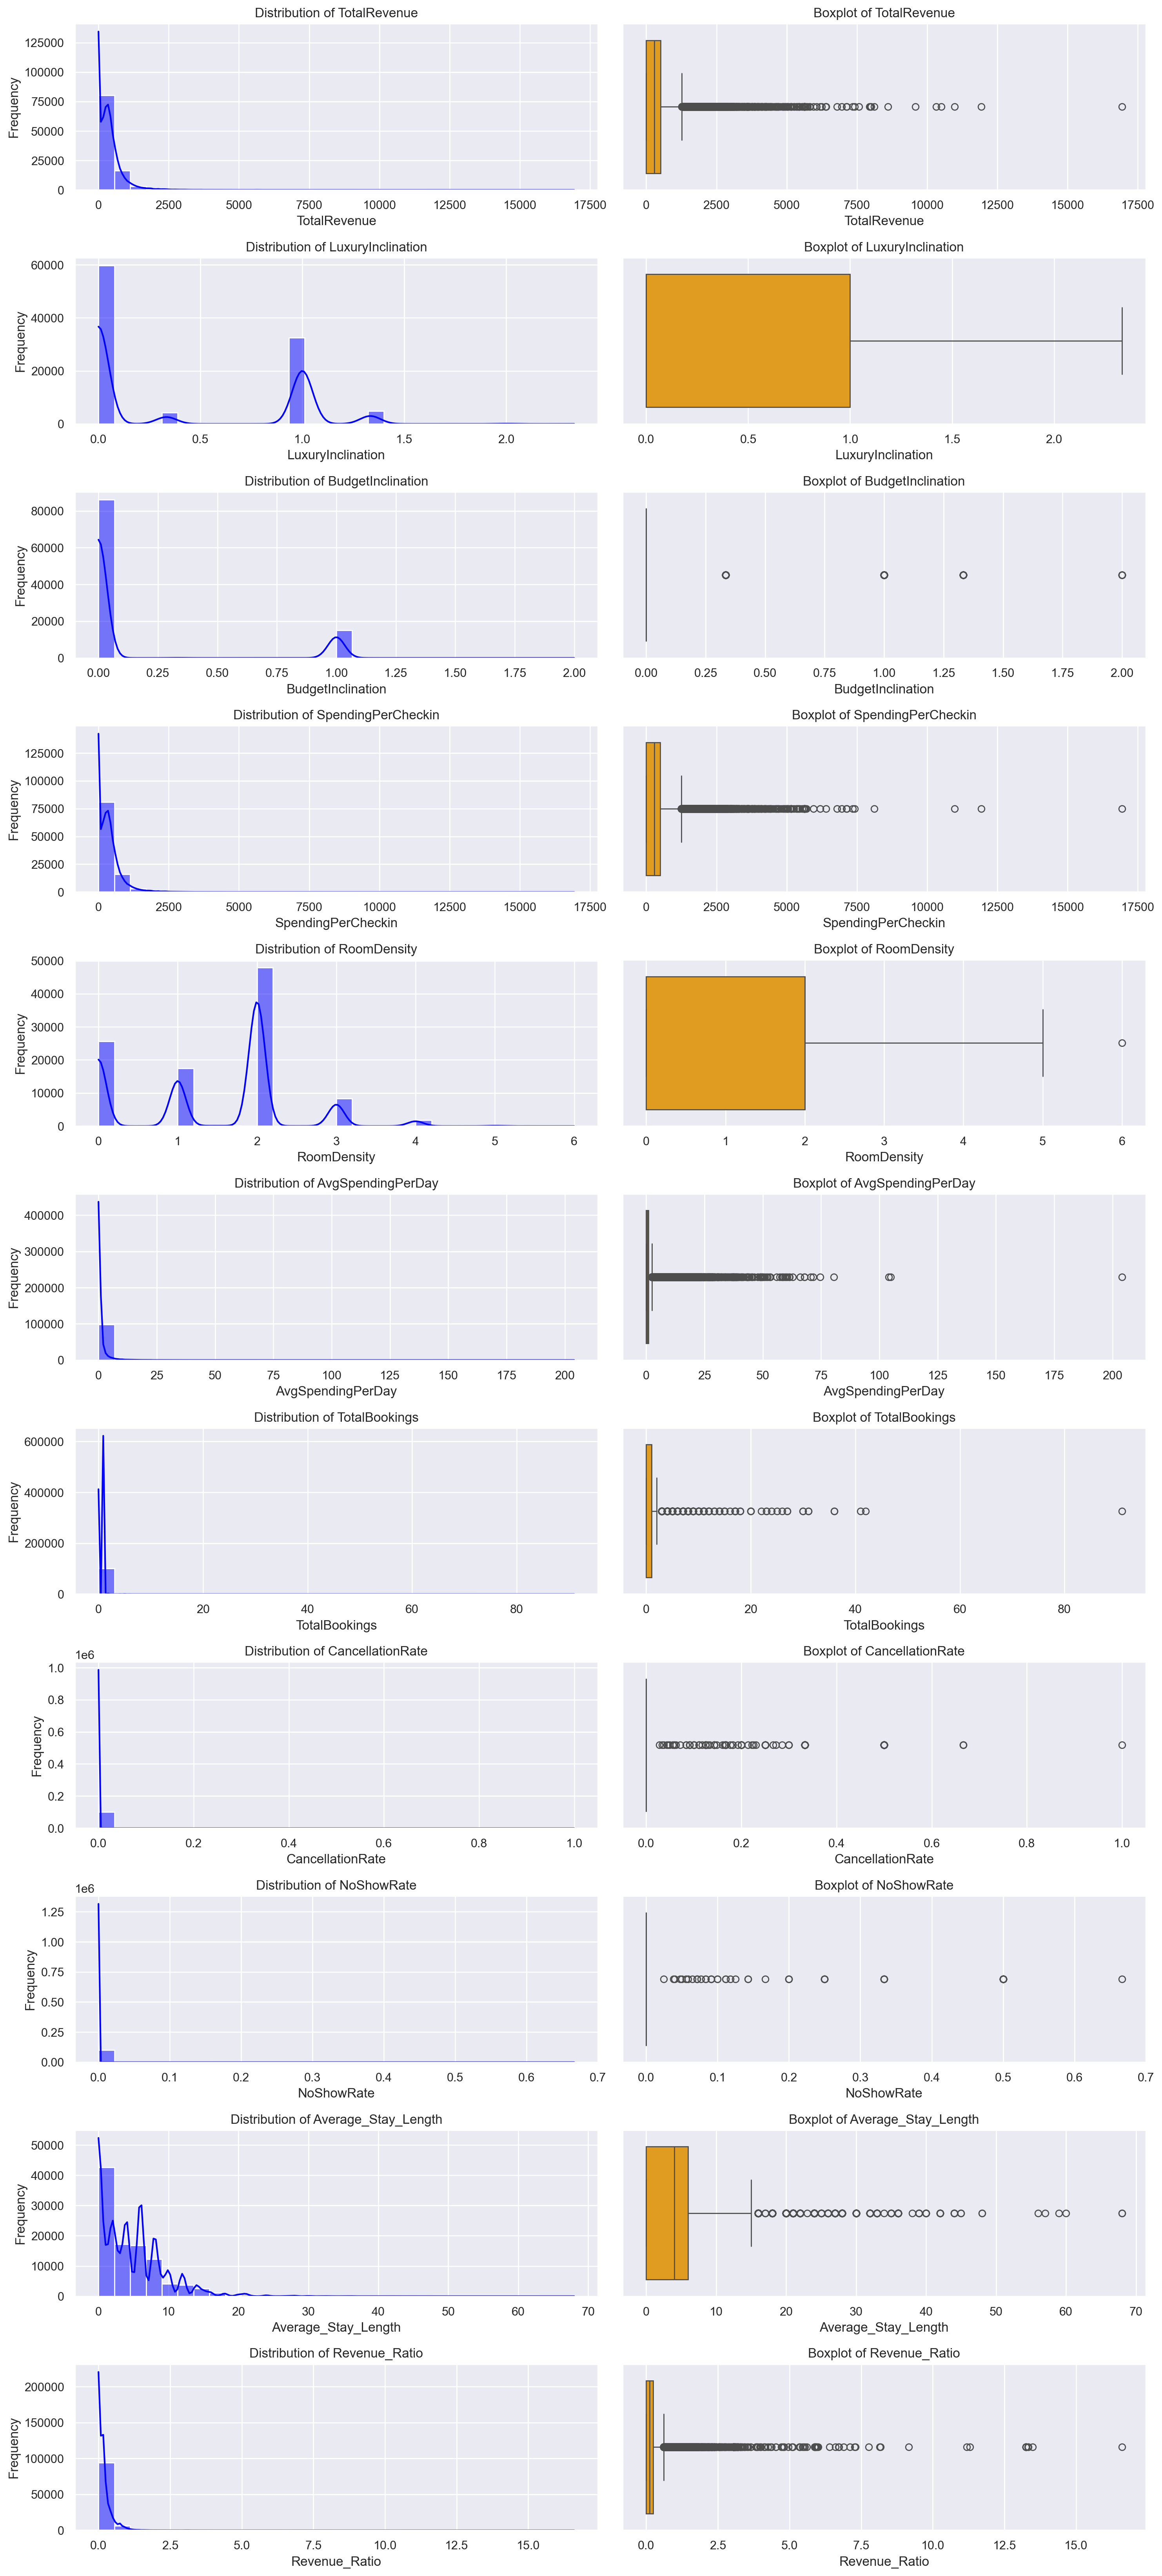

In [81]:
plot_distribution_and_boxplot(X, ['TotalRevenue', 'LuxuryInclination', 'BudgetInclination', 'SpendingPerCheckin', 'RoomDensity', 'AvgSpendingPerDay', 'TotalBookings', 'CancellationRate', 'NoShowRate', 'Average_Stay_Length', 'Revenue_Ratio'])

### 4.4.2 Categorical new features

>1. <code>region</code>: country's continent region.
>2. <code>Spending Tier</code>:  Categorize customers into low, medium, and high spenders.
>3. <code>Age Groups</code>: Create bins (e.g., <25, 25-40, 40-60, 60+).
>4. <code>Lead Time Segments</code>: Group AverageLeadTime (e.g., Last-Minute <7 days, Early Planner >30 days).
>5.  <code>Quiet Room Preference Score</code>: SRQuietRoom + SRAwayFromElevator.


In [82]:
iso3_to_region = {
    'AFG': 'Asia', 'ALB': 'South East Europe', 'DZA': 'Africa', 'ASM': 'Oceania', 'AND': 'South West Europe',
    'AGO': 'Africa', 'AIA': 'North America', 'ATG': 'North America', 'ARG': 'South America', 'ARM': 'Asia',
    'ABW': 'North America', 'AUS': 'Oceania', 'AUT': 'Central Europe', 'AZE': 'Asia', 'BHS': 'North America',
    'BHR': 'Asia', 'BGD': 'Asia', 'BRB': 'North America', 'BLR': 'Eastern Europe', 'BEL': 'Western Europe',
    'BLZ': 'North America', 'BEN': 'Africa', 'BMU': 'North America', 'BTN': 'Asia', 'BOL': 'South America',
    'BIH': 'South East Europe', 'BWA': 'Africa', 'BRA': 'South America', 'VGB': 'North America', 'BRN': 'Asia',
    'BGR': 'South East Europe', 'BFA': 'Africa', 'BDI': 'Africa', 'KHM': 'Asia', 'CMR': 'Africa',
    'CAN': 'North America', 'CPV': 'Africa', 'CYM': 'North America', 'CAF': 'Africa', 'TCD': 'Africa',
    'CHL': 'South America', 'CHN': 'Asia', 'COL': 'South America', 'COM': 'Africa', 'COG': 'Africa',
    'COK': 'Oceania', 'CRI': 'North America', 'CIV': 'Africa', 'HRV': 'South East Europe', 'CUB': 'North America',
    'CYP': 'Asia', 'CZE': 'Central Europe', 'DNK': 'Northern Europe', 'DJI': 'Africa', 'DMA': 'North America',
    'DOM': 'North America', 'ECU': 'South America', 'EGY': 'Africa', 'SLV': 'North America', 'GNQ': 'Africa',
    'ERI': 'Africa', 'EST': 'Eastern Europe', 'ETH': 'Africa', 'FLK': 'South America', 'FRO': 'Northern Europe',
    'FJI': 'Oceania', 'FIN': 'Northern Europe', 'FRA': 'Western Europe', 'GUF': 'South America', 'PYF': 'Oceania',
    'GAB': 'Africa', 'GMB': 'Africa', 'GEO': 'Asia', 'DEU': 'Western Europe', 'GHA': 'Africa',
    'GIB': 'South West Europe', 'GRC': 'South East Europe', 'GRD': 'North America', 'GTM': 'North America', 'GIN': 'Africa',
    'GNB': 'Africa', 'GUY': 'South America', 'HTI': 'North America', 'HND': 'North America', 'HUN': 'Central Europe',
    'ISL': 'Northern Europe', 'IND': 'Asia', 'IDN': 'Asia', 'IRN': 'Asia', 'IRQ': 'Asia',
    'IRL': 'Western Europe', 'ISR': 'Asia', 'ITA': 'South West Europe', 'JAM': 'North America', 'JPN': 'Asia',
    'JOR': 'Asia', 'KAZ': 'Asia', 'KEN': 'Africa', 'KIR': 'Oceania', 'KOR': 'Asia',
    'KWT': 'Asia', 'KGZ': 'Asia', 'LAO': 'Asia', 'LVA': 'Eastern Europe', 'LBN': 'Asia',
    'LSO': 'Africa', 'LBR': 'Africa', 'LBY': 'Africa', 'LIE': 'Central Europe', 'LTU': 'Eastern Europe',
    'LUX': 'Western Europe', 'MKD': 'South East Europe', 'MDG': 'Africa', 'MWI': 'Africa', 'MYS': 'Asia',
    'MDV': 'Asia', 'MLI': 'Africa', 'MLT': 'Southern Europe', 'MRT': 'Africa', 'MUS': 'Africa',
    'MEX': 'North America', 'MDA': 'Eastern Europe', 'MCO': 'Western Europe', 'MNG': 'Asia', 'MAR': 'Africa',
    'MOZ': 'Africa', 'MMR': 'Asia', 'NAM': 'Africa', 'NPL': 'Asia', 'NLD': 'Western Europe',
    'NZL': 'Oceania', 'NIC': 'North America', 'NER': 'Africa', 'NGA': 'Africa', 'NOR': 'Northern Europe',
    'OMN': 'Asia', 'PAK': 'Asia', 'PAN': 'North America', 'PNG': 'Oceania', 'PRY': 'South America',
    'PER': 'South America', 'PHL': 'Asia', 'POL': 'Eastern Europe', 'PRT': 'South West Europe', 'QAT': 'Asia',
    'ROU': 'South East Europe', 'RUS': 'Asia', 'RWA': 'Africa', 'SAU': 'Asia', 'SEN': 'Africa',
    'SYC': 'Africa', 'SLE': 'Africa', 'SGP': 'Asia', 'SVK': 'Central Europe', 'SVN': 'South East Europe',
    'SOM': 'Africa', 'ZAF': 'Africa', 'ESP': 'South West Europe', 'LKA': 'Asia', 'SDN': 'Africa',
    'SUR': 'South America', 'SWZ': 'Africa', 'SWE': 'Northern Europe', 'CHE': 'Western Europe', 'SYR': 'Asia',
    'TWN': 'Asia', 'TJK': 'Asia', 'TZA': 'Africa', 'THA': 'Asia', 'TGO': 'Africa',
    'TTO': 'North America', 'TUN': 'Africa', 'TUR': 'Asia', 'TKM': 'Asia', 'UGA': 'Africa',
    'UKR': 'Eastern Europe', 'ARE': 'Asia', 'GBR': 'Western Europe', 'USA': 'North America', 'URY': 'South America',
    'UZB': 'Asia', 'VUT': 'Oceania', 'VEN': 'South America', 'VNM': 'Asia', 'ZMB': 'Africa',
    'ZWE': 'Africa'
}

# Assign Region to dataset based on Nationality (ISO3 code)
X['Region'] = X['Nationality'].map(iso3_to_region).fillna('Other')

# Define Spending Tier limits based on Total_Revenue_Per_Stay quartiles
spending_tier_bins = [-float('inf'), 368.25, float('inf')]  # Ensures 0 is included
spending_tier_labels = ['Low Spender', 'High Spender']

# Create Spending Tier feature
X['Spending_Tier'] = pd.cut(X['Total_Revenue_Per_Stay'],
                                  bins=spending_tier_bins,
                                  labels=spending_tier_labels,
                                  include_lowest=True)  # Includes 0 in 'Low Spender'

# 2. Age Groups - Binning Age into categories
X['Age_Group'] = pd.cut(
    X['Age'],  # Fill NaN with a value that won't match any bin
    bins=[0, 30, 50, float('inf')],
    labels=['<30', '30-50', '50+']
)

# 3. Lead Time Segments - Binning AverageLeadTime into categories
X['Lead_Time_Segment'] = pd.cut(
    X['AverageLeadTime'],  # Fill NaN with a value that won't match any bin
    bins=[0, 7, 30, float('inf')],
    labels=['Last-Minute (<7 Days)', 'Standard (7-30 Days)', 'Early Planner (>30 Days)']
)

# Quiet Room Preference Score
X['Quiet_Room_Preference_Score'] = X['SRQuietRoom'] + X['SRAwayFromElevator']

categorical = categorical + ['Quiet_Room_Preference_Score', 'Lead_Time_Segment', 'Age_Group', 'Spending_Tier', 'Region']

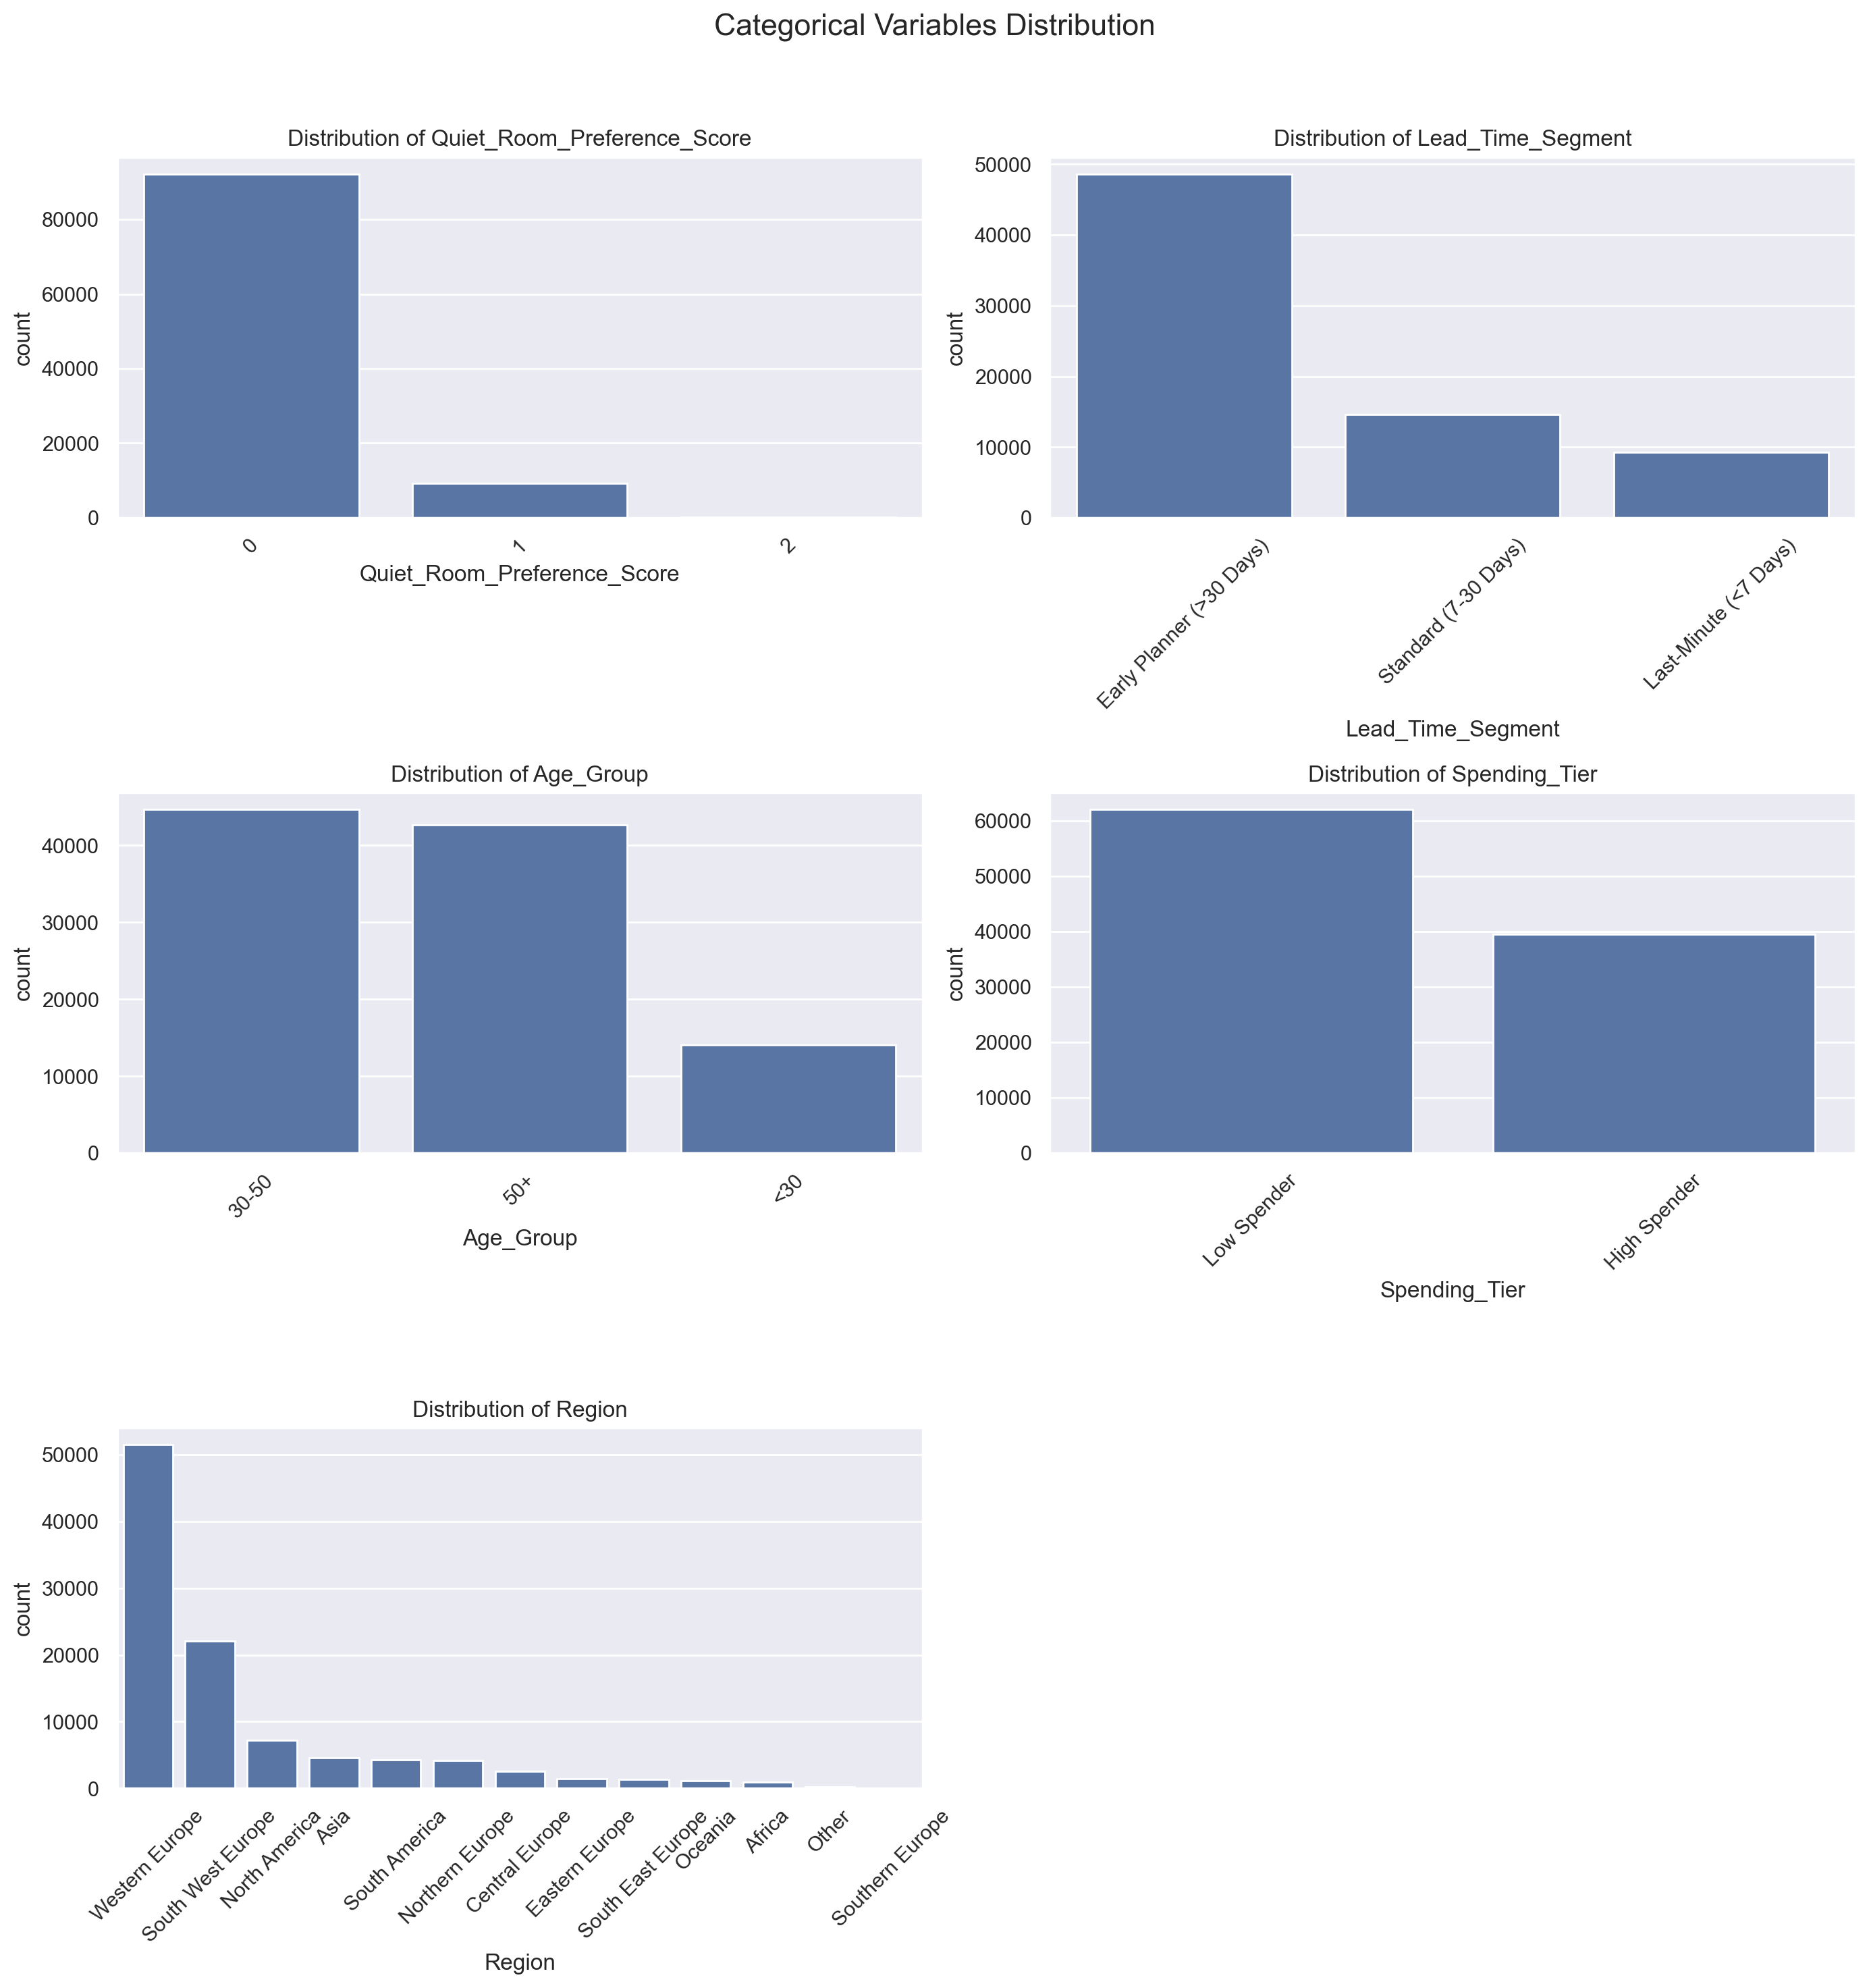

In [83]:
plot_categorical_distributions(X, ['Quiet_Room_Preference_Score', 'Lead_Time_Segment', 'Age_Group', 'Spending_Tier', 'Region'])

## 4.5 Feature Selection

In [84]:
def correlation_pairs(data, variables, threshold):
    correlation_matrix = data[variables].corr()

    # Get the absolute values of the correlation matrix
    abs_corr_matrix = correlation_matrix.abs()

    # Identify pairs with high correlation, avoiding duplicates by only considering the upper triangular matrix
    high_corr_pairs = [
        (feature_1, feature_2, float(abs_corr_matrix.loc[feature_1, feature_2]))
        for i, feature_1 in enumerate(abs_corr_matrix.columns)
        for j, feature_2 in enumerate(abs_corr_matrix.columns)
        if i < j and abs_corr_matrix.loc[feature_1, feature_2] > threshold
    ]

    return high_corr_pairs

correlation_pairs(X, numerical, 0.75)

[('BookingsCheckedIn', 'TotalBookings', 0.9941945978315467),
 ('LodgingRevenue', 'TotalRevenue', 0.9705879498610998),
 ('LodgingRevenue', 'SpendingPerCheckin', 0.9334972956078339),
 ('PersonsNights', 'RoomNights', 0.8868259134066817),
 ('PersonsNights', 'Average_Stay_Length', 0.9691575386456349),
 ('RoomNights', 'Average_Stay_Length', 0.8104516793795477),
 ('TotalRevenue', 'SpendingPerCheckin', 0.9614272259877332)]

In [85]:
X.drop(['TotalBookings', 'LodgingRevenue', 'PersonsNights', 'RoomNights'], axis=1, inplace=True)

numerical = [x for x in numerical if x not in ['TotalBookings', 'LodgingRevenue', 'PersonsNights', 'RoomNights']]

In [87]:
correlation_pairs(X, numerical, 0.75)

[('TotalRevenue', 'SpendingPerCheckin', 0.9614272259877332)]

### Correlation matrix

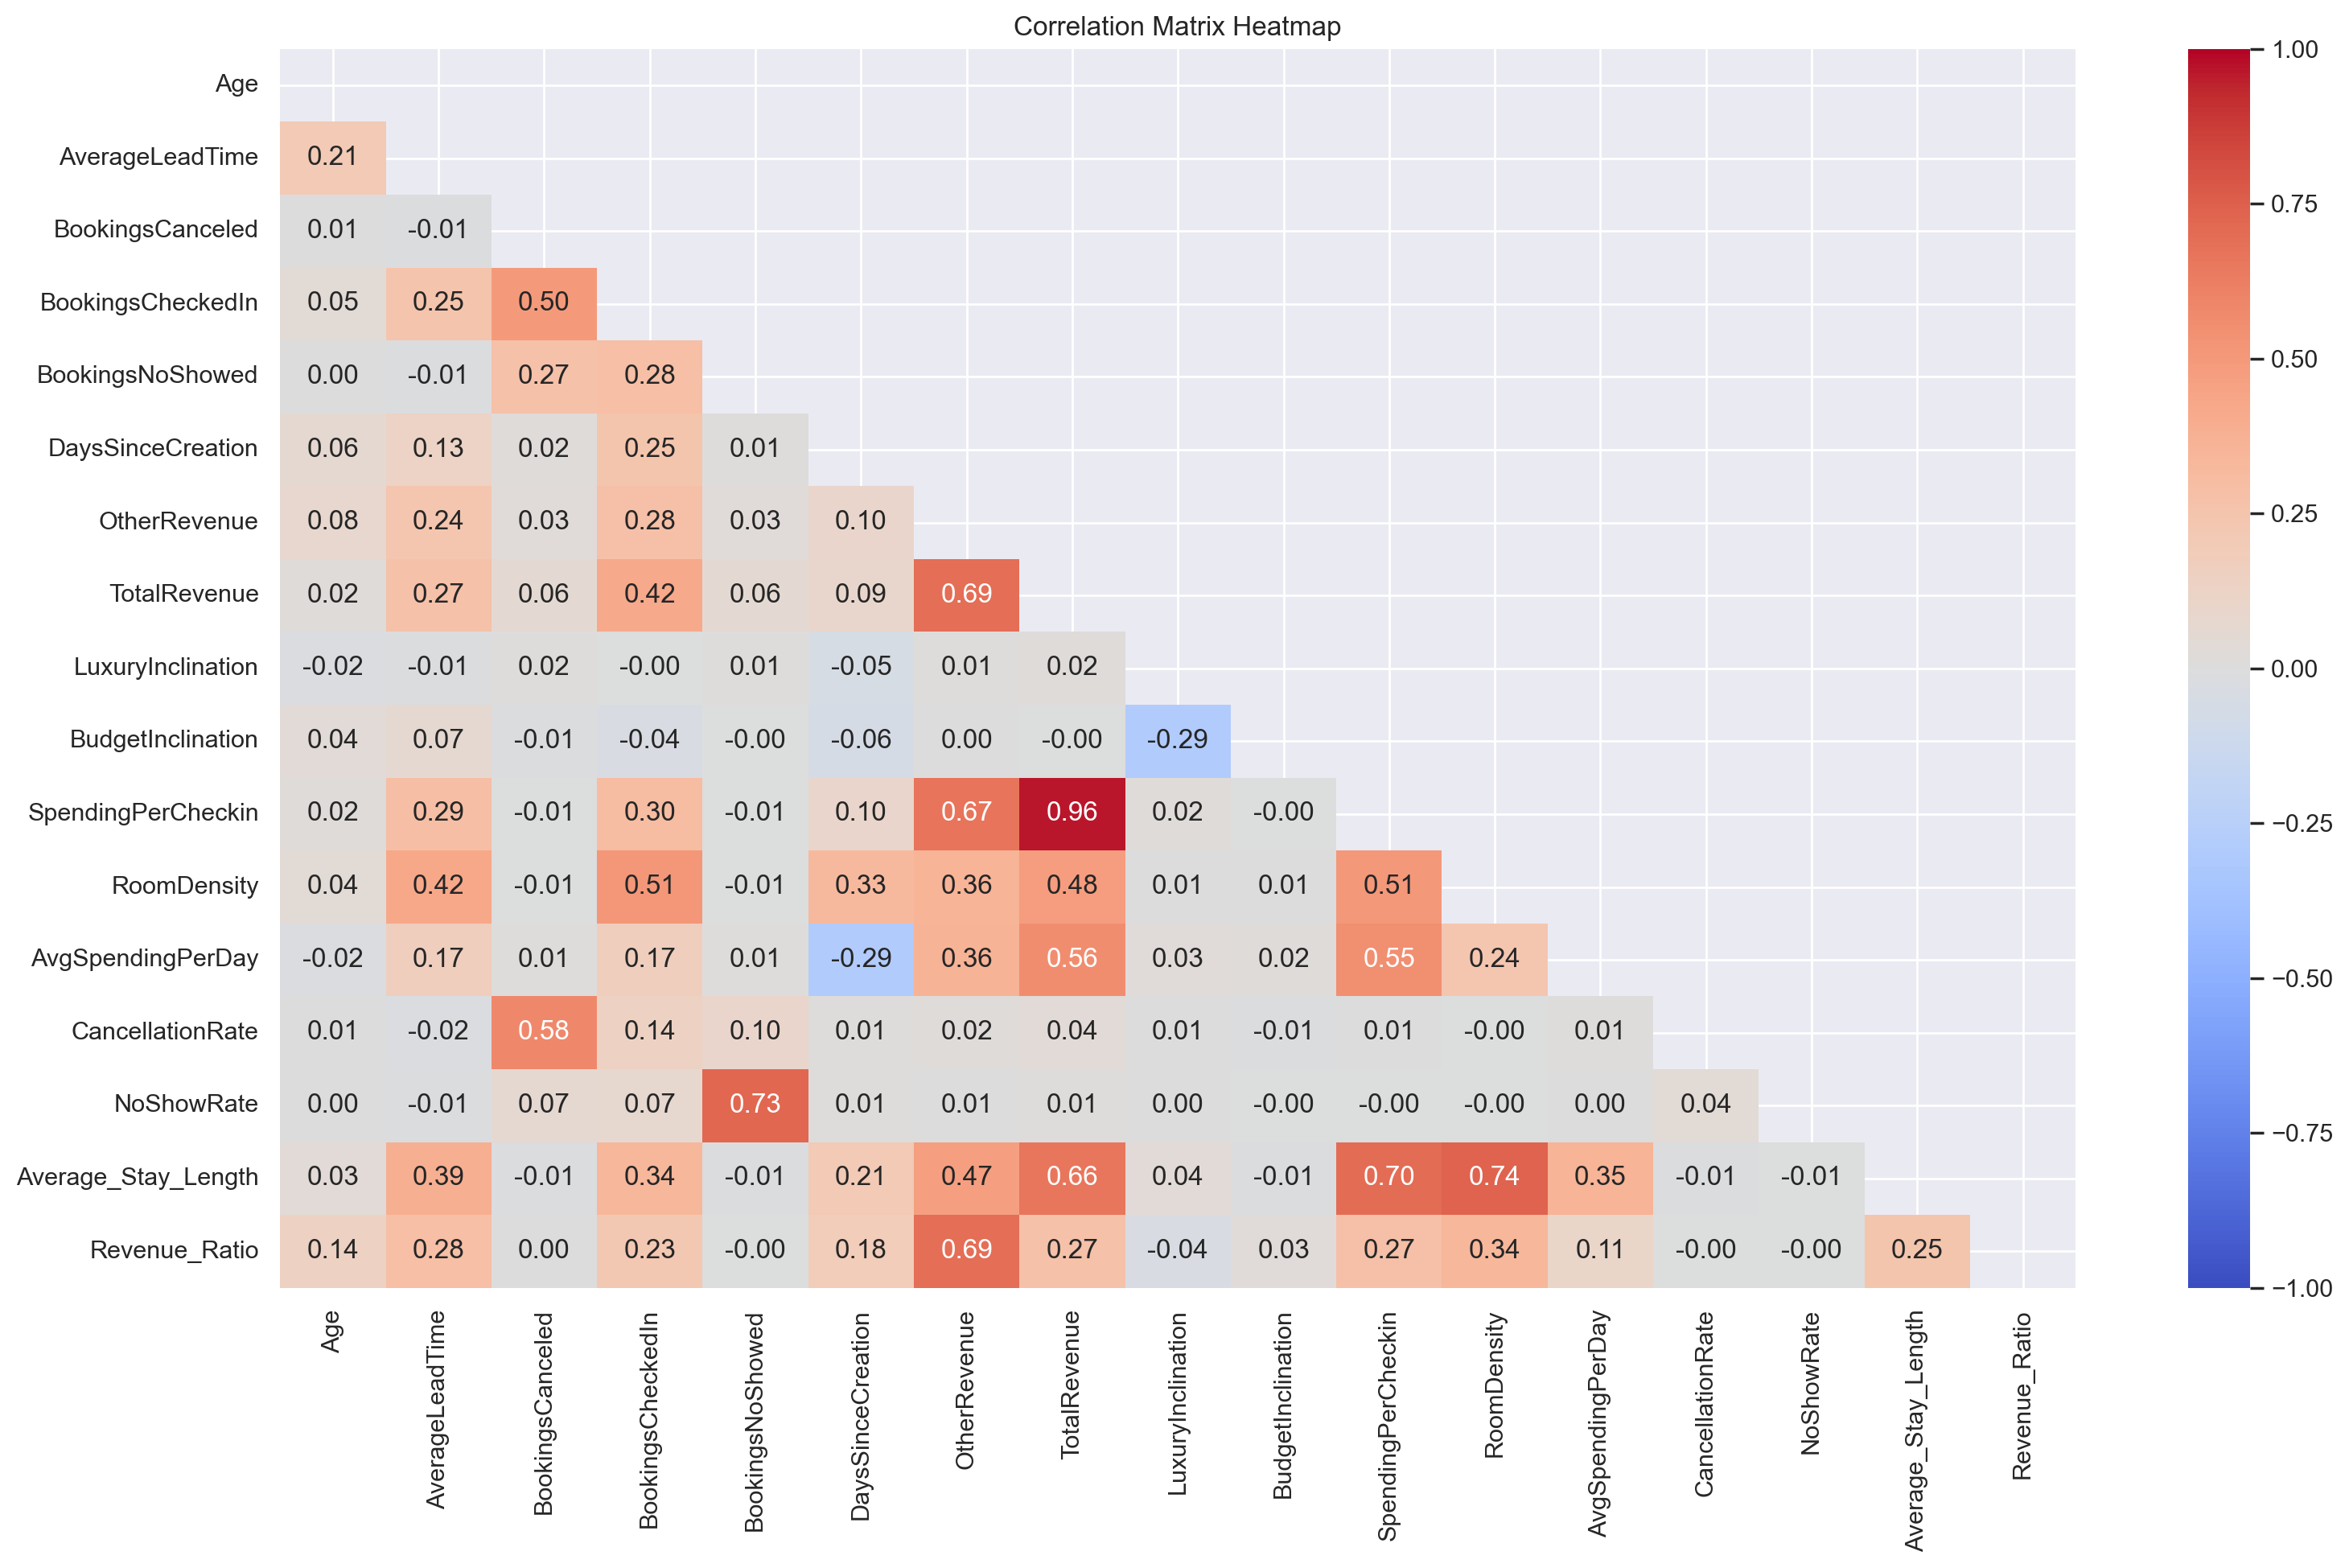

In [88]:
correlation_matrix = X[numerical].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(18, 10))  # Set the figure size
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

## 4.6 Data Skewness

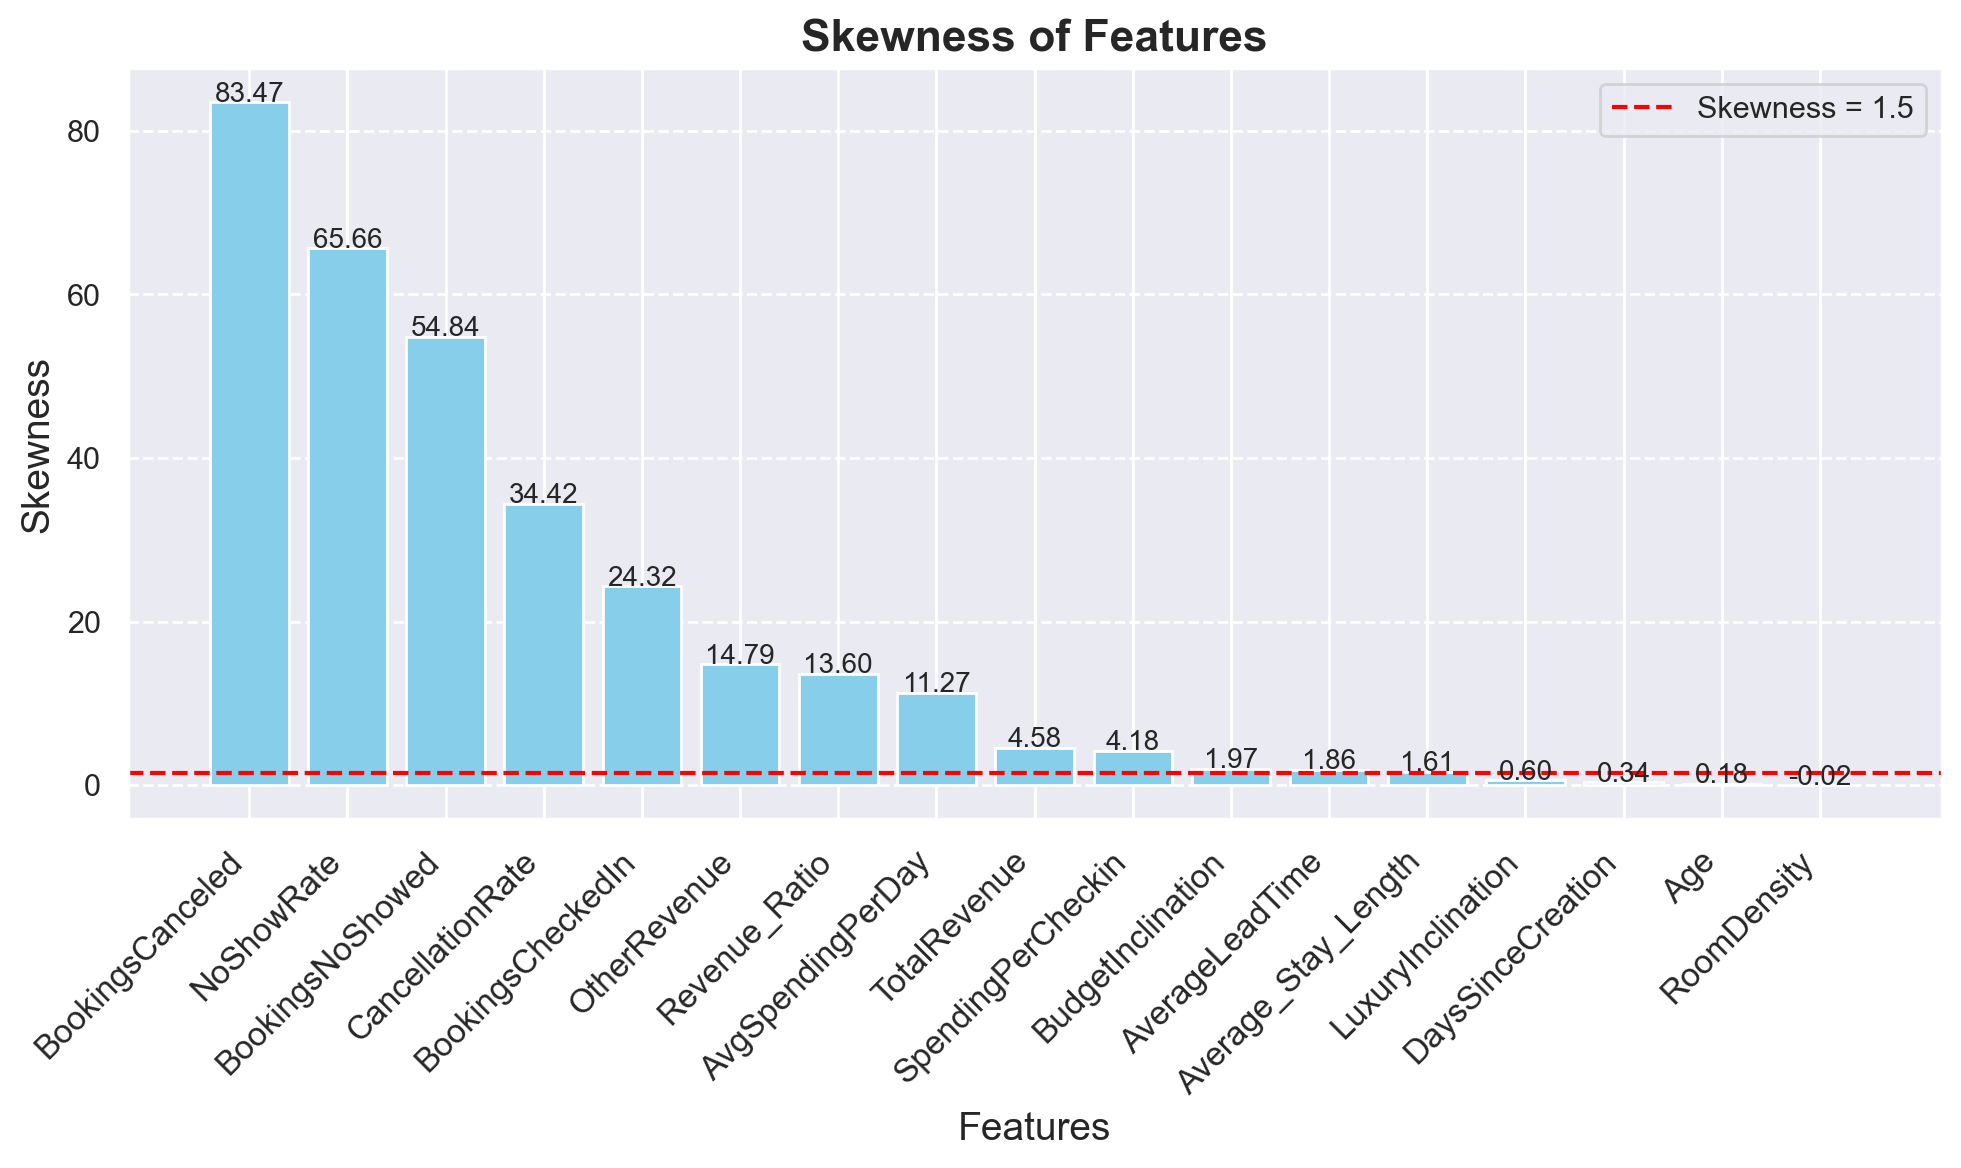

Features with skewness above 1.5: ['BookingsCanceled', 'NoShowRate', 'BookingsNoShowed', 'CancellationRate', 'BookingsCheckedIn', 'OtherRevenue', 'Revenue_Ratio', 'AvgSpendingPerDay', 'TotalRevenue', 'SpendingPerCheckin', 'BudgetInclination', 'AverageLeadTime', 'Average_Stay_Length']


In [92]:
skewness = X[numerical].apply(lambda x: skew(x, nan_policy='omit'))

sorted_skewness = skewness.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_skewness.index, sorted_skewness, color='skyblue')
plt.axhline(y=1.5, color='red', linestyle='--', label="Skewness = 1.5")
plt.title("Skewness of Features", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=14)
plt.ylabel("Skewness", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}', ha='center', fontsize=10)

plt.grid(True, axis='y', linestyle='--', alpha=1)
plt.legend()
plt.tight_layout()
plt.show()

high_skew_features = sorted_skewness[sorted_skewness > 1.5].index.tolist()
print(f"Features with skewness above 1.5: {high_skew_features}")

Transforming high skew features into log scale

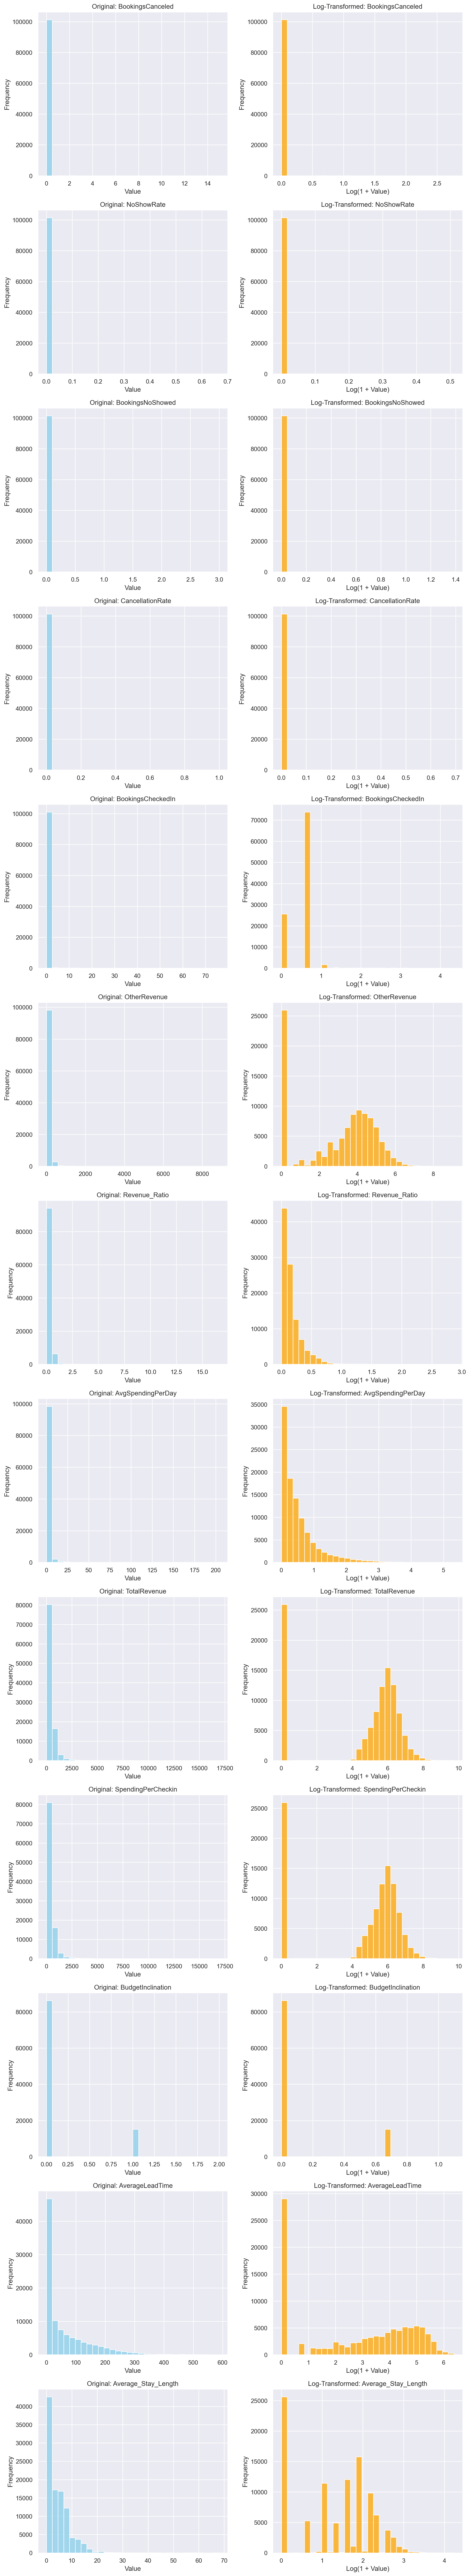

In [95]:
for column in high_skew_features:
    X[f'{column}_log'] = np.log1p(X[column])
    numerical = numerical + [f'{column}_log']

num_rows = (len(high_skew_features) * 2 + 1) // 2
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5 * num_rows))

axes = axes.flatten()

for i, column in enumerate(high_skew_features):
    if i * 2 < len(axes):  # Ensure there are enough axes
        # Plot original column histogram
        sns.histplot(X[column], kde=False, ax=axes[i * 2], color='skyblue', bins=30)
        axes[i * 2].set_title(f"Original: {column}")
        axes[i * 2].set_xlabel("Value")
        axes[i * 2].set_ylabel("Frequency")

        # Plot log-transformed column histogram
        sns.histplot(X[f'{column}_log'], kde=False, ax=axes[i * 2 + 1], color='orange', bins=30)
        axes[i * 2 + 1].set_title(f"Log-Transformed: {column}")
        axes[i * 2 + 1].set_xlabel("Log(1 + Value)")
        axes[i * 2 + 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [96]:
original_skewness = X[high_skew_features].apply(lambda x: skew(x, nan_policy='omit'))

log_skewness = X[[f'{column}_log' for column in high_skew_features]].apply(lambda x: skew(x, nan_policy='omit'))

skew_comparison_original = pd.DataFrame({
    'Skewness': original_skewness
})

skew_comparison_log = pd.DataFrame({
    'Skewness after log': log_skewness
})

skew_comparison_original.reset_index(inplace=True)
skew_comparison_log.reset_index(inplace=True)

skew_comparison_original.rename(columns={'index': 'Feature'}, inplace=True)
skew_comparison_log.rename(columns={'index': 'Feature log'}, inplace=True)

skew_comparison = pd.concat([skew_comparison_original, skew_comparison_log], axis=1)

skew_comparison.drop(columns=['Feature log'], inplace=True)

skew_comparison


Feature   Skewness  Skewness after log
0      BookingsCanceled  83.469017           32.634143
1            NoShowRate  65.662717           62.783542
2      BookingsNoShowed  54.840633           47.494802
3      CancellationRate  34.423548           32.393223
4     BookingsCheckedIn  24.320294           -0.553917
5          OtherRevenue  14.788388           -0.457697
6         Revenue_Ratio  13.601276            2.529525
7     AvgSpendingPerDay  11.274852            1.977361
8          TotalRevenue   4.580347           -0.932335
9    SpendingPerCheckin   4.177708           -0.933383
10    BudgetInclination   1.966666            1.962305
11      AverageLeadTime   1.855142           -0.233175
12  Average_Stay_Length   1.611916           -0.259355

Updating list of variables

In [97]:
for var in high_skew_features:
    numerical.remove(var)

## 4.7 Outlier Removal with Transformed Outliers

C:\Users\afons\PycharmProjects\BC\functions.py:204: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



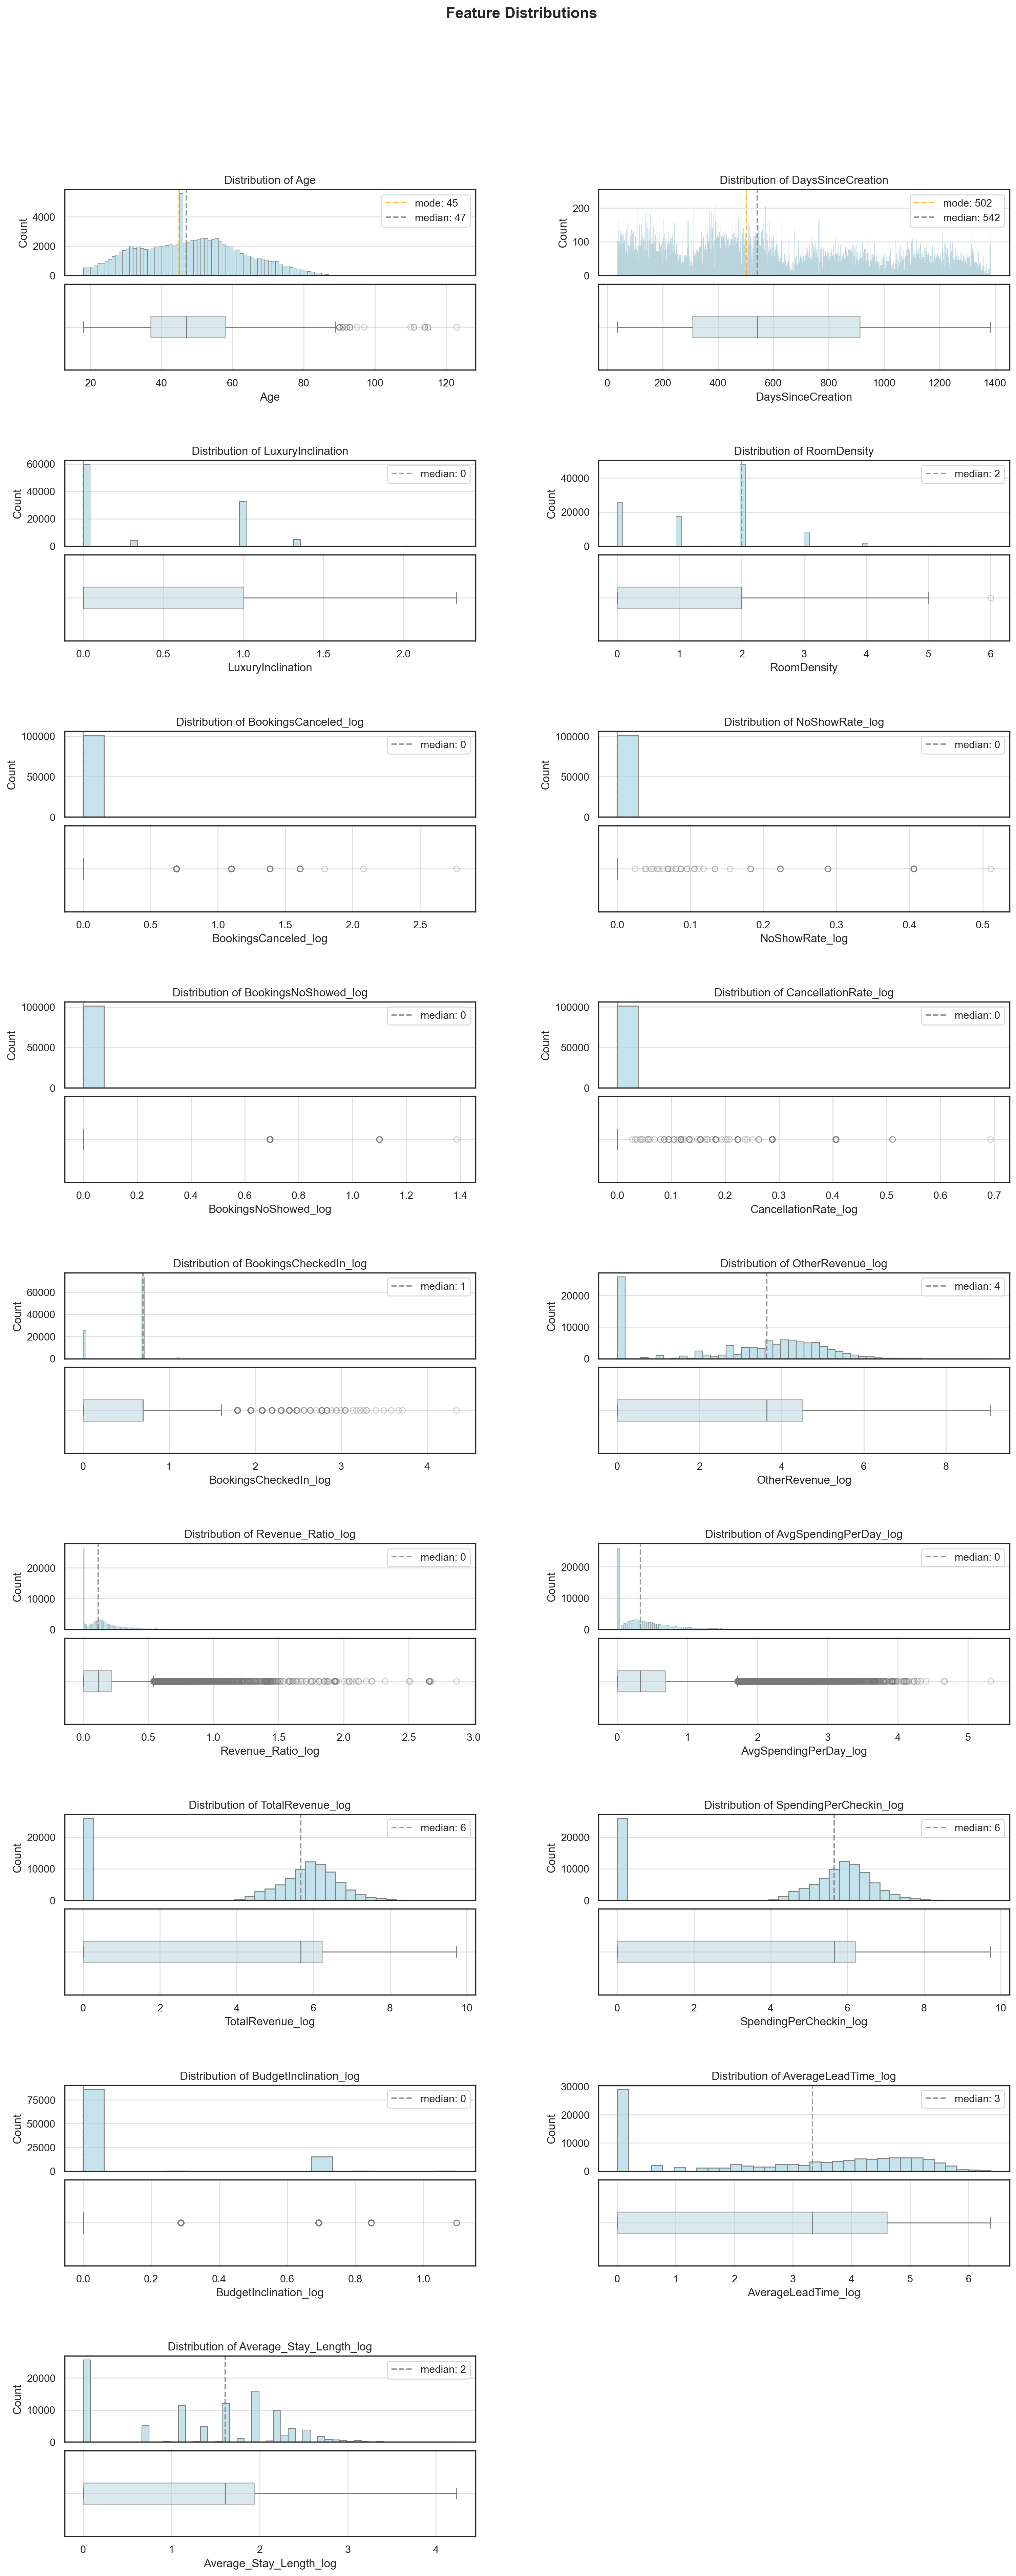

In [99]:
plot_distribution_grid(X, numerical)

### 4.7.1 Outlier Removal of Existing Variables

Columns with right outliers (percentile): ['BudgetInclination_log']
Columns with right outliers (IQR): ['Age', 'BookingsCheckedIn_log', 'Revenue_Ratio_log', 'AvgSpendingPerDay_log']
Columns with left outliers (IQR): []
Columns with left outliers (percentile): []
Upper Bound for Age: 121.0
Lower Bound for Age: -26.0
--------------------------------------------------
Upper Bound for BookingsCheckedIn_log: 2.772588722239781
Lower Bound for BookingsCheckedIn_log: -2.0794415416798357
--------------------------------------------------
Upper Bound for Revenue_Ratio_log: 0.8648924338785439
Lower Bound for Revenue_Ratio_log: -0.6486693254089079
--------------------------------------------------
Upper Bound for AvgSpendingPerDay_log: 2.7339410785928333
Lower Bound for AvgSpendingPerDay_log: -2.050455808944625
--------------------------------------------------
Rows removed for each:{'Age': 1, 'BookingsCheckedIn_log': 25, 'Revenue_Ratio_log': 603, 'AvgSpendingPerDay_log': 901}
Total removed:1530
P

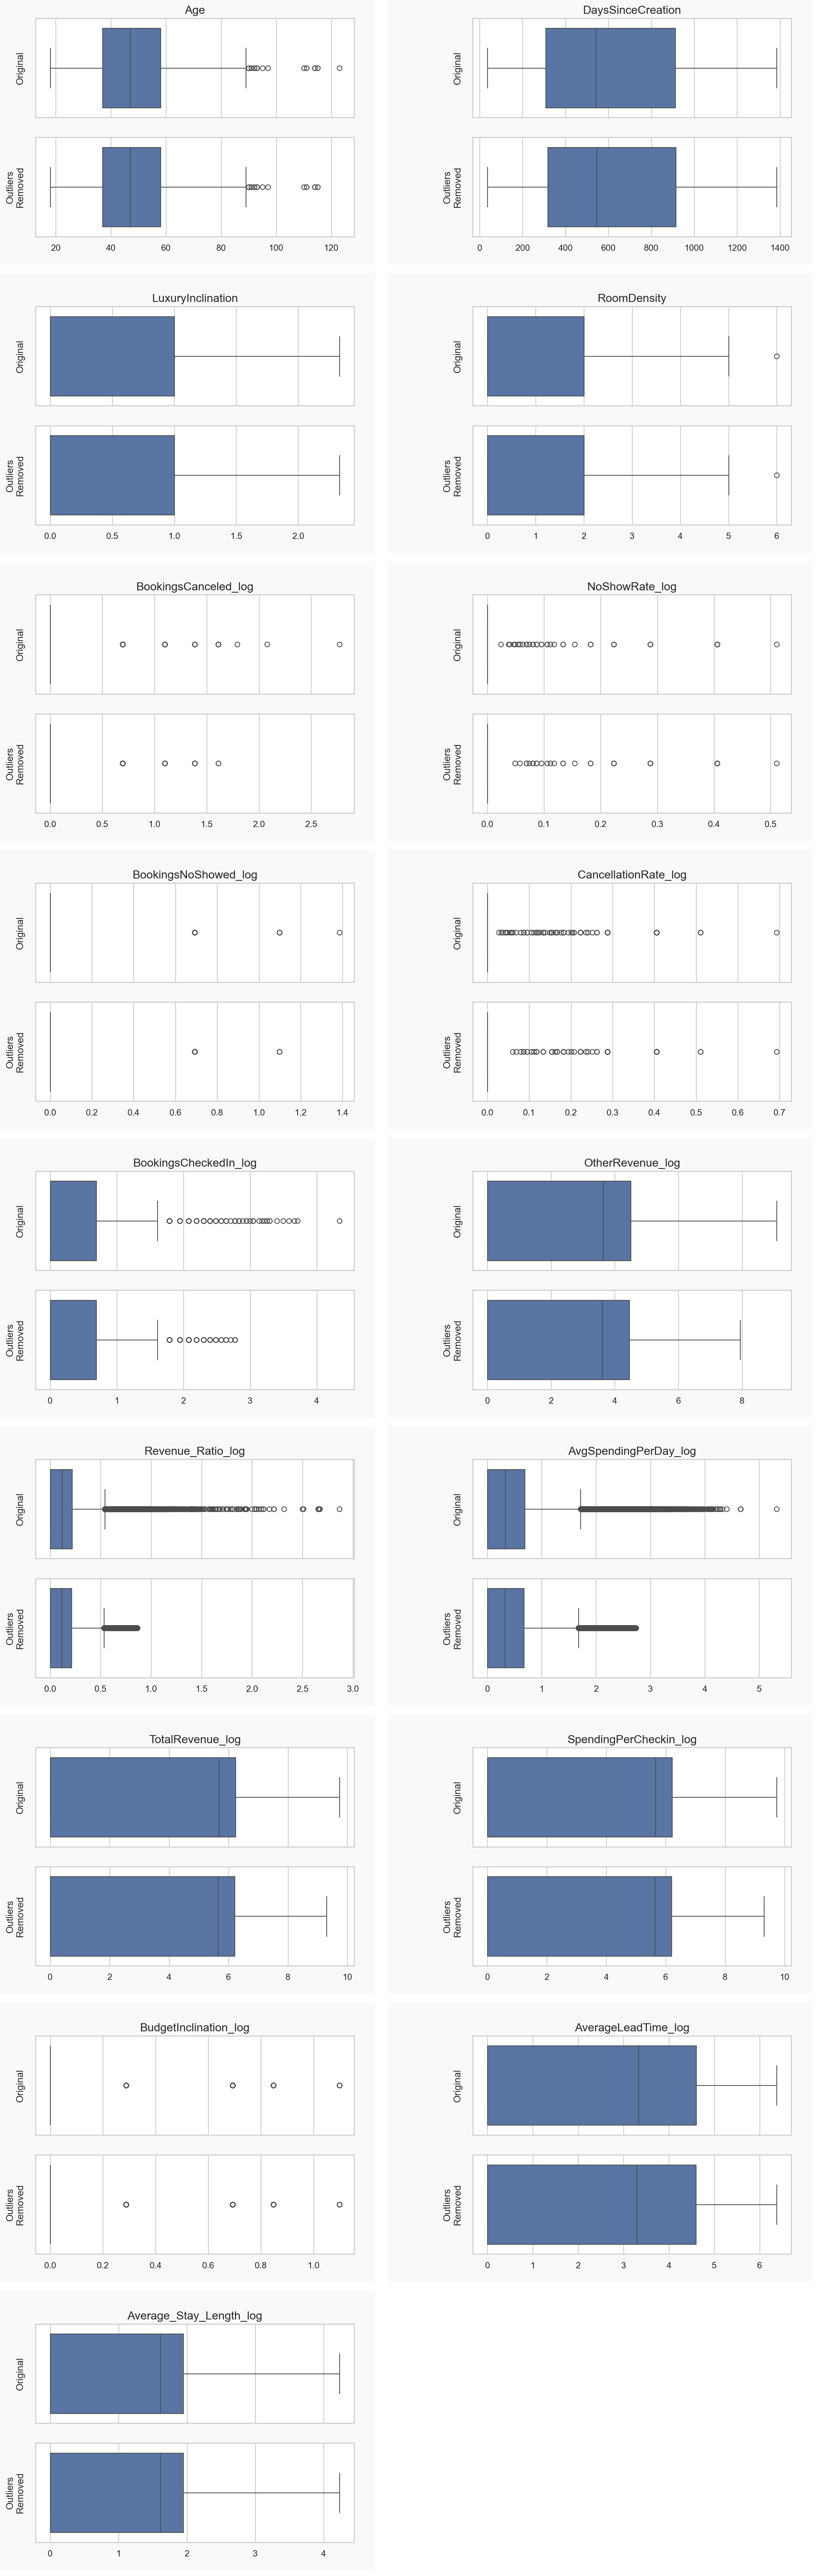

In [100]:
right_perc,right_iqr,left_iqr,left_perc = iqr_or_percentile(X,numerical,3)
df_transformed_wo_outliers = remove_outliers_iqr(X,right_iqr,3)

compare_figure_outliers(X,df_transformed_wo_outliers,numerical)

> Check how many were dropped

In [102]:
(X.shape[0]-df_transformed_wo_outliers.shape[0])/X.shape[0]*100

1.5082658885460514

>  Remove a total from 1.5082% of the data.

In [ ]:
'''
# Create a boxplot for all numerical columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical feature and create a horizontal boxplot
for i, col in enumerate(numerical):
    sns.boxplot(x=col, data=X, color="darkblue", ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

man_filter = (
    (X['Age']>= 18)
    &
    (X['Age']< 100)
    &
    (X['AverageLeadTime']>= 0)
    &
    (X['AverageLeadTime']<= 500)
    &
    (X['BookingsCheckedIn']<= 30)
    &
    (X['LodgingRevenue']<= 10000)
    &
    (X['OtherRevenue']<= 4000)
    &
    (X['PersonsNights']<= 60)
    &
    (X['RoomNights']<= 50)
)

# percentage lost when removing outliers
print(f"Percentage of data lost when removing outliers is {(X.shape[0] - X[man_filter].shape[0])/X.shape[0] * 100:.2f}%")

X = X[man_filter]
'''

Updating dataframe

In [103]:
X[numerical] = df_transformed_wo_outliers[numerical]

## 4.8 Normalization

### Min-Max Scaler

In [106]:
X_minmax = X[numerical].copy()

# Initialize MinMaxScaler
mm_scaler = MinMaxScaler()

# Apply MinMaxScaler and create a new DataFrame with scaled values
mm_scaled_feat = mm_scaler.fit_transform(X_minmax)

# Replace the original columns with scaled values
X_minmax = pd.DataFrame(mm_scaled_feat, columns=X_minmax.columns, index=X_minmax.index)

# Display the updated DataFrame
X_minmax.head()

Age  DaysSinceCreation  LuxuryInclination  RoomDensity  \
ID                                                                
1   0.350515           0.299481                0.0     0.250000   
2   0.278351           1.000000                0.0     0.333333   
3   0.144330           1.000000                0.0     0.000000   
4   0.443299           1.000000                0.0     0.333333   
5   0.350515           1.000000                0.0     0.000000   

    BookingsCanceled_log  NoShowRate_log  BookingsNoShowed_log  \
ID                                                               
1               0.430677             0.0                   0.0   
2               0.000000             0.0                   0.0   
3               0.000000             0.0                   0.0   
4               0.000000             0.0                   0.0   
5               0.000000             0.0                   0.0   

    CancellationRate_log  BookingsCheckedIn_log  OtherRevenue_log  \
ID                                                                  
1               0.415037               0.396241          0.556773   
2               0.000000               0.250000          0.502201   
3               0.000000               0.000000          0.000000   
4               0.000000               0.250000          0.517547   
5               0.000000               0.000000          0.000000   

    Revenue_Ratio_log  AvgSpendingPerDay_log  TotalRevenue_log  \
ID                                                               
1            0.287163               0.225200          0.637106   
2            0.200482               0.078826          0.624576   
3            0.000000               0.000000          0.000000   
4            0.258065               0.071730          0.613395   
5            0.000000               0.000000          0.000000   

    SpendingPerCheckin_log  BudgetInclination_log  AverageLeadTime_log  \
ID                                                                       
1                 0.562893                    0.0             0.641905   
2                 0.624576                    0.0             0.647046   
3                 0.000000                    0.0             0.000000   
4                 0.613395                    0.0             0.712291   
5                 0.000000                    0.0             0.000000   

    Average_Stay_Length_log  
ID                           
1                  0.327411  
2                  0.566329  
3                  0.000000  
4                  0.566329  
5                  0.000000

### Standard Scaler

In [107]:
# Copy the numerical columns
X_standard = X[numerical].copy()

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler and create a new DataFrame with scaled values
scaled_features = scaler.fit_transform(X_standard)

# Replace the original columns with scaled values
X_standard = pd.DataFrame(scaled_features, columns=X_standard.columns, index=X_standard.index)

# Display the updated DataFrame
X_standard.head()

Age  DaysSinceCreation  LuxuryInclination  RoomDensity  \
ID                                                                
1   0.291404          -0.470668          -0.793248     0.065014   
2  -0.185932           2.059910          -0.793248     0.555173   
3  -1.072413           2.059910          -0.793248    -1.405463   
4   0.905122           2.059910          -0.793248     0.555173   
5   0.291404           2.059910          -0.793248    -1.405463   

    BookingsCanceled_log  NoShowRate_log  BookingsNoShowed_log  \
ID                                                               
1              22.734091       -0.018177             -0.020782   
2              -0.035514       -0.018177             -0.020782   
3              -0.035514       -0.018177             -0.020782   
4              -0.035514       -0.018177             -0.020782   
5              -0.035514       -0.018177             -0.020782   

    CancellationRate_log  BookingsCheckedIn_log  OtherRevenue_log  \
ID                                                                  
1              25.939044               1.796478          0.758810   
2              -0.033674               0.525712          0.538289   
3              -0.033674              -1.646676         -1.491076   
4              -0.033674               0.525712          0.600299   
5              -0.033674              -1.646676         -1.491076   

    Revenue_Ratio_log  AvgSpendingPerDay_log  TotalRevenue_log  \
ID                                                               
1            0.618493               0.275811          0.579209   
2            0.149646              -0.484946          0.535517   
3           -0.934743              -0.894634         -1.642303   
4            0.461106              -0.521826          0.496530   
5           -0.934743              -0.894634         -1.642303   

    SpendingPerCheckin_log  BudgetInclination_log  AverageLeadTime_log  \
ID                                                                       
1                 0.327495              -0.419656             0.653060   
2                 0.543332              -0.419656             0.668904   
3                -1.642162              -0.419656            -1.325308   
4                 0.504208              -0.419656             0.869990   
5                -1.642162              -0.419656            -1.325308   

    Average_Stay_Length_log  
ID                           
1                  0.067087  
2                  1.164190  
3                 -1.436379  
4                  1.164190  
5                 -1.436379

### Comparing Scalers

In [108]:
def plot_scaled_features(X, X_minmax, X_standard, numerical):
    # Prepare an empty DataFrame to combine data for plotting
    data_for_plot = pd.DataFrame()

    # Loop over each column in the DataFrames
    for feature in numerical:
        # Combine data from all three DataFrames for the current feature
        df_original = X[[feature]].rename(columns={feature: 'Value'}).reset_index(drop=True)
        df_original['Scaler'] = 'Original'
        df_original['Feature'] = feature

        df_minmax = X_minmax[[feature]].rename(columns={feature: 'Value'}).reset_index(drop=True)
        df_minmax['Scaler'] = 'Min-Max'
        df_minmax['Feature'] = feature

        df_standard = X_standard[[feature]].rename(columns={feature: 'Value'}).reset_index(drop=True)
        df_standard['Scaler'] = 'Standard'
        df_standard['Feature'] = feature

        # Concatenate into the plotting DataFrame
        data_for_plot = pd.concat([data_for_plot, df_original, df_minmax, df_standard], ignore_index=True)

    # Convert the 'Value' column to numeric (to avoid errors with non-numeric data)
    data_for_plot['Value'] = pd.to_numeric(data_for_plot['Value'], errors='coerce')

    # Plotting: Create boxplots for each feature
    num_features = len(numerical)
    rows_per_figure = len(numerical)  # Number of rows (features) to plot per figure

    for start_idx in range(0, num_features, rows_per_figure):
        # Define the range of features to plot in this figure
        end_idx = min(start_idx + rows_per_figure, num_features)
        features_to_plot = numerical[start_idx:end_idx]

        # Filter data for this subset of features
        subset_data = data_for_plot[data_for_plot['Feature'].isin(features_to_plot)]

        # Create the figure
        plt.figure(figsize=(15, 5 * len(features_to_plot)))

        # Loop through each feature and create a subplot
        for idx, feature in enumerate(features_to_plot, 1):
            plt.subplot(len(features_to_plot), 1, idx)
            sns.boxplot(data=subset_data[subset_data['Feature'] == feature], x='Value', y='Scaler', orient='h')
            plt.title(f'Feature: {feature}')

        # Adjust layout and show the plot
        plt.tight_layout()
        plt.show()

plot_scaled_features(X, X_minmax, X_standard, numerical)

### Selecting the best Scaler

In [ ]:
final_df = X_standard.copy()

## Principal Components Analysis (PCA)

### PCA output table

In [ ]:
pca = PCA()
pca_feat = pca.fit_transform(final_df)

# Get the eigenvalues (explained variance)
explained_variance = pca.explained_variance_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# get the cumulative explained variance ratio
# Hint: use np.cumsum()
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Combine into a dataframe
pca_results = pd.DataFrame(
    {
        "Eigenvalue": explained_variance,
        "Difference": np.insert(np.diff(explained_variance), 0, 0),
        "Proportion": explained_variance_ratio,
        "Cumulative": cumulative_explained_variance_ratio
    },
        index=range(1, pca.n_components_ + 1)
)

pca_results.head()

### Explained varience and Eigenvalues

In [ ]:
def plot_pca_variance(pca, explained_variance, explained_variance_ratio, cumulative_explained_variance_ratio):
    # figure and axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # draw plots
    ax1.plot(explained_variance,  # PLOT THE EIGENVALUES (EXPLAINED VARIANCE)
             marker=".", markersize=12)

    ax2.plot(explained_variance_ratio,  # PLOT THE EXPLAINED VARIANCE RATIO
             marker=".", markersize=12, label="Proportion")

    ax2.plot(cumulative_explained_variance_ratio,  # PLOT THE CUMULATIVE EXPLAINED VARIANCE RATIO
             marker=".", markersize=12, linestyle="--", label="Cumulative")

    # customizations
    ax2.legend()
    ax1.set_title("Scree Plot", fontsize=14)
    ax2.set_title("Variance Explained", fontsize=14)
    ax1.set_ylabel("Eigenvalue")
    ax2.set_ylabel("Proportion")
    ax1.set_xlabel("Components")
    ax2.set_xlabel("Components")
    ax1.set_xticks(range(0, pca.n_components_, 2))
    ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
    ax2.set_xticks(range(0, pca.n_components_, 2))
    ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

    plt.show()

plot_pca_variance(pca, explained_variance, explained_variance_ratio, cumulative_explained_variance_ratio)

### PCA with 5 components

In [ ]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=5)
pca_feat = pca.fit_transform(final_df)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]

# remember index=df_pca.index
pca_df = pd.DataFrame(pca_feat, index=final_df.index, columns=pca_feat_names)
pca_df.head()

## Creating Perspectives